<a href="https://colab.research.google.com/github/Melissa-k/oc_projet03/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import sys
import os
ROOT_DIR = "/content/drive/MyDrive/OpenClassrooms/PROJET_03/"
sys.path.append(ROOT_DIR) 
sys.path.insert(0,'/content/drive/MyDrive/OpenClassrooms/PROJET_03')
from google.colab import files
import functions_project03

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#pd.options.display.max_columns = 1000
pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows",1000)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


# DATA CLEANING

In [4]:
zipfilename = "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip"
unzipfilename = "fr_openfoodfacts_org_products.csv"
filepath = ROOT_DIR + "data/" + unzipfilename
# data saving
if not os.path.exists(ROOT_DIR + "data/"):
    os.mkdir(ROOT_DIR + "data/")
# data saving
if not os.path.exists(ROOT_DIR + "figures/"):
    os.mkdir(ROOT_DIR + "figures")

# Reading of the raw data
df_raw_data = pd.read_csv(filepath, sep="\t",low_memory=False, header=0, encoding='utf-8')
df_raw_data.head(3) 

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compléter,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité complétée,Nom du produit complete,Photos à valider,Photos envoyées",NaN,

### Analyse du taux de remplissage

In [5]:
#remplacement des "faux NaN" en NaN reconnus par pandas
df_raw_data.replace(to_replace = '^nan$', value = np.nan, regex=True,inplace=True)
proportion_nan_raw = df_raw_data.isna().sum().divide(df_raw_data.shape[0]/100).sort_values(ascending=True)

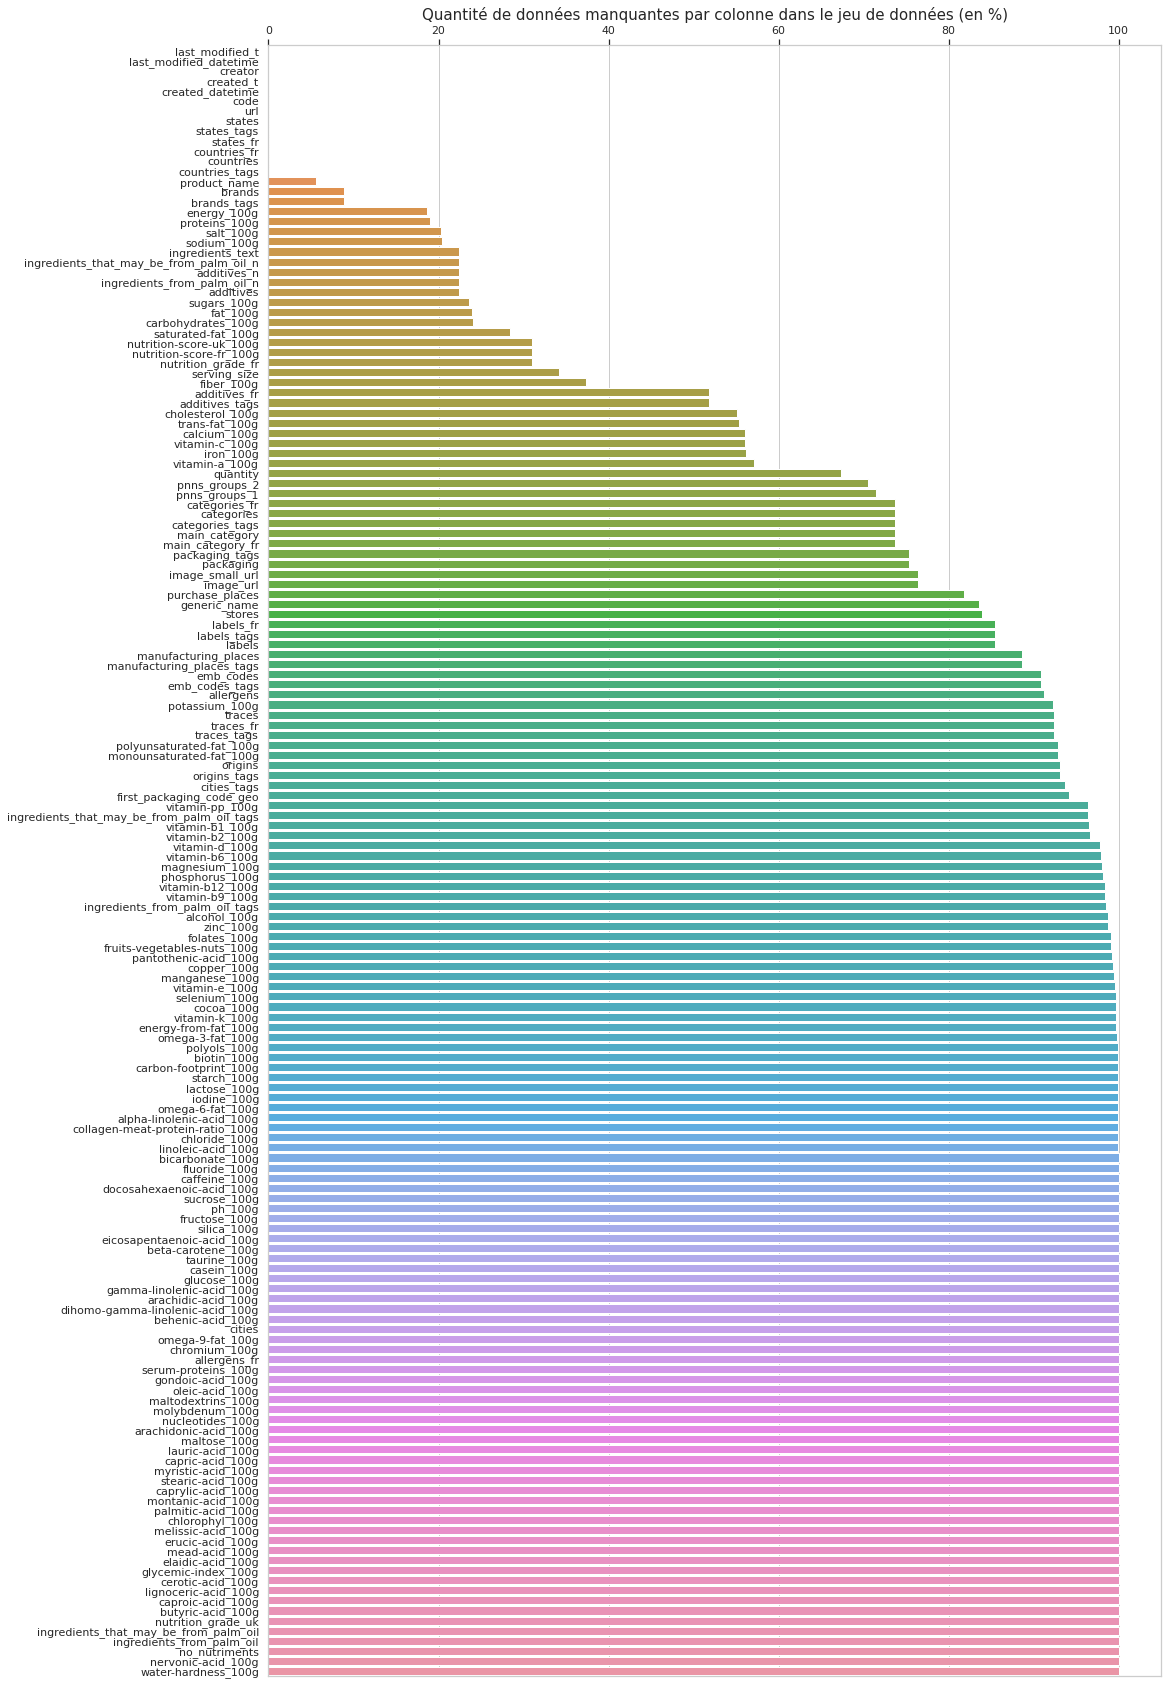

In [6]:
# Visualisation graphique du taux de remplissage  
sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_nan_raw.index, x=proportion_nan_raw.values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le jeu de données (en %)', size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


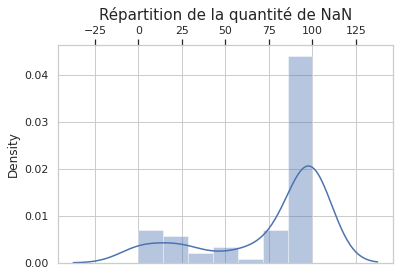

In [7]:
sns.set(style="whitegrid")
ax = sns.distplot(proportion_nan_raw.values)
ax.xaxis.set_ticks_position('top')
plt.title('Répartition de la quantité de NaN', size=15)
plt.show()

Au delà de `50% de données manquantes`, les données imputées affectent beaucoup trop les résultats d'analyses. Il a donc été décidé de supprimer les colonnes ayant plus de 50% de données manquantes.
Par ailleurs, une suppression de données aberrante, ie des masses de composants supérieures à leur masse totale (ici 100g).

In [8]:
### Suppression des données redondantes 
df_raw_data.drop(columns=['code','countries_tags','countries','url','creator','created_t','serving_size','created_datetime','last_modified_t', 'states_fr', 'states_tags', 'states'], inplace=True, axis=1)

In [9]:
#import functions_project03.clean_nan as clean_nan
df_raw_data = functions_project03.clean_nan(df_raw_data, 0.60)
columns = df_raw_data.columns.tolist()

Nombre de colonnes supprimées : 120


### Nettoyage et correction des types de données

#### Format timestamp des colonnes

In [10]:
### Exploration des données temporelles : colonnes qui contiennent le _t et le _datetime
print(df_raw_data.iloc[:,df_raw_data.columns.str.endswith('_t')].head())
print('\n', df_raw_data.iloc[:,df_raw_data.columns.str.endswith('_datetime')].head())
df = df_raw_data.iloc[:,df_raw_data.columns.str.endswith('_t')]
print(df.columns)

### FUNCTIONS
def clean_convert_datetime(value):
    try:
        return pd.to_datetime(value)
    except ValueError:
        id_stranger = df_raw_data.index[df_raw_data["last_modified_datetime"]==value].tolist()
        df_raw_data.drop(id_stranger, axis=0, inplace=True)
    return value

column = "last_modified_datetime"
df_raw_data.loc[:, column] = df_raw_data[column].apply(clean_convert_datetime)
#df_raw_data[column] = pd.to_datetime(df_raw_data[column]) 
print(df_raw_data.shape)
df_raw_data[column].dtypes

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

   last_modified_datetime
0  2016-09-17T09:18:13Z 
1  2017-03-09T14:32:37Z 
2  2017-03-09T14:32:37Z 
3  2017-03-09T10:35:31Z 
4  2017-03-09T10:34:13Z 
Index([], dtype='object')
(320749, 30)


datetime64[ns, UTC]

In [11]:
# Float data
float_columns = df_raw_data.select_dtypes(['float64']).columns
for column in float_columns :
  print(column)
  df_raw_data.loc[:, column] = df_raw_data[column].apply(functions_project03.clean_convert_float)
# categorical data
data_cleaned = functions_project03.nettoyage_categorie(df_raw_data)

additives_n
ingredients_from_palm_oil_n
ingredients_that_may_be_from_palm_oil_n
energy_100g
fat_100g
saturated-fat_100g
trans-fat_100g
cholesterol_100g
carbohydrates_100g
sugars_100g
fiber_100g
proteins_100g
salt_100g
sodium_100g
vitamin-a_100g
vitamin-c_100g
calcium_100g
iron_100g
nutrition-score-fr_100g
nutrition-score-uk_100g


In [12]:
df_raw_data.replace(to_replace = '^nan$', value = np.nan, regex=True,inplace=True)
#df_raw_data.replace(to_replace = '^NaN$', value = np.nan, regex=True,inplace=True)
for column in float_columns :
    print(column)
    print(df_raw_data[df_raw_data[column].isna()].shape)


additives_n
(71810, 30)
ingredients_from_palm_oil_n
(71810, 30)
ingredients_that_may_be_from_palm_oil_n
(71810, 30)
energy_100g
(59636, 30)
fat_100g
(76858, 30)
saturated-fat_100g
(91195, 30)
trans-fat_100g
(177451, 30)
cholesterol_100g
(176659, 30)
carbohydrates_100g
(77161, 30)
sugars_100g
(75778, 30)
fiber_100g
(119863, 30)
proteins_100g
(60843, 30)
salt_100g
(65239, 30)
sodium_100g
(65286, 30)
vitamin-a_100g
(183195, 30)
vitamin-c_100g
(179882, 30)
calcium_100g
(179699, 30)
iron_100g
(180287, 30)
nutrition-score-fr_100g
(99539, 30)
nutrition-score-uk_100g
(99539, 30)


#### Suppression des données aberrantes

In [13]:
## Les données supprimées car étant aberrantes ie >100g
data_to_suppress_salt = df_raw_data[(df_raw_data["salt_100g"]>100) | (df_raw_data["salt_100g"]<0.0)]
data_to_suppress_calcium = df_raw_data[(df_raw_data["calcium_100g"]>100) | (df_raw_data["calcium_100g"]<0.0)]
data_to_suppress_sugars = df_raw_data[(df_raw_data["sugars_100g"]>100)  | (df_raw_data["sugars_100g"]<0.0)]

data_to_suppress_carbohydrates = df_raw_data[(df_raw_data["carbohydrates_100g"]>100) | (df_raw_data["carbohydrates_100g"]<0.0)]
data_to_suppress_proteins = df_raw_data[(df_raw_data["proteins_100g"]>100) | (df_raw_data["proteins_100g"]<0.0)]
data_to_suppress_fiber = df_raw_data[(df_raw_data["fiber_100g"]>100) | (df_raw_data["fiber_100g"]<0.0)]

data_to_suppress_iron = df_raw_data[(df_raw_data["iron_100g"]>100) | (df_raw_data["iron_100g"]<0.0)]
data_to_suppress_vitamin_c = df_raw_data[(df_raw_data["vitamin-c_100g"]>100) | (df_raw_data["vitamin-c_100g"]<0.0)]
data_to_suppress_vitamin_a = df_raw_data[(df_raw_data["vitamin-a_100g"]>100) | (df_raw_data["vitamin-a_100g"]<0.0)]

data_to_suppress_cholesterol = df_raw_data[(df_raw_data["cholesterol_100g"]>100) | (df_raw_data["cholesterol_100g"]<0.0)]
data_to_suppress_fat = df_raw_data[(df_raw_data["fat_100g"]>100) | (df_raw_data["fat_100g"]<0.0)]
data_to_suppress_saturated_fat = df_raw_data[(df_raw_data["saturated-fat_100g"]>100) | (df_raw_data["saturated-fat_100g"]<0.0)]
data_to_suppress_trans_fat = df_raw_data[(df_raw_data["trans-fat_100g"]>100) | (df_raw_data["trans-fat_100g"]<0.0)]

In [14]:
# Donnees aberrantes
abnormaldata_diff = pd.concat([data_to_suppress_salt, data_to_suppress_calcium, data_to_suppress_sugars,data_to_suppress_carbohydrates,
                              data_to_suppress_proteins, data_to_suppress_fiber,data_to_suppress_iron,data_to_suppress_vitamin_a,data_to_suppress_vitamin_c,
                              data_to_suppress_cholesterol, data_to_suppress_fat,data_to_suppress_saturated_fat,data_to_suppress_trans_fat])
abnormaldata_diff.drop_duplicates(keep='first', inplace=True)

In [15]:
### Suppression des données aberrantes pour les variables d'intérêt dont le taux de données aberrantes est 
print(df_raw_data.shape)
df_raw_data = pd.concat([df_raw_data,abnormaldata_diff])
print(df_raw_data.shape)
df_raw_data.drop_duplicates(keep=False, inplace=True)
print(df_raw_data.shape)

(320749, 30)
(320968, 30)
(318708, 30)


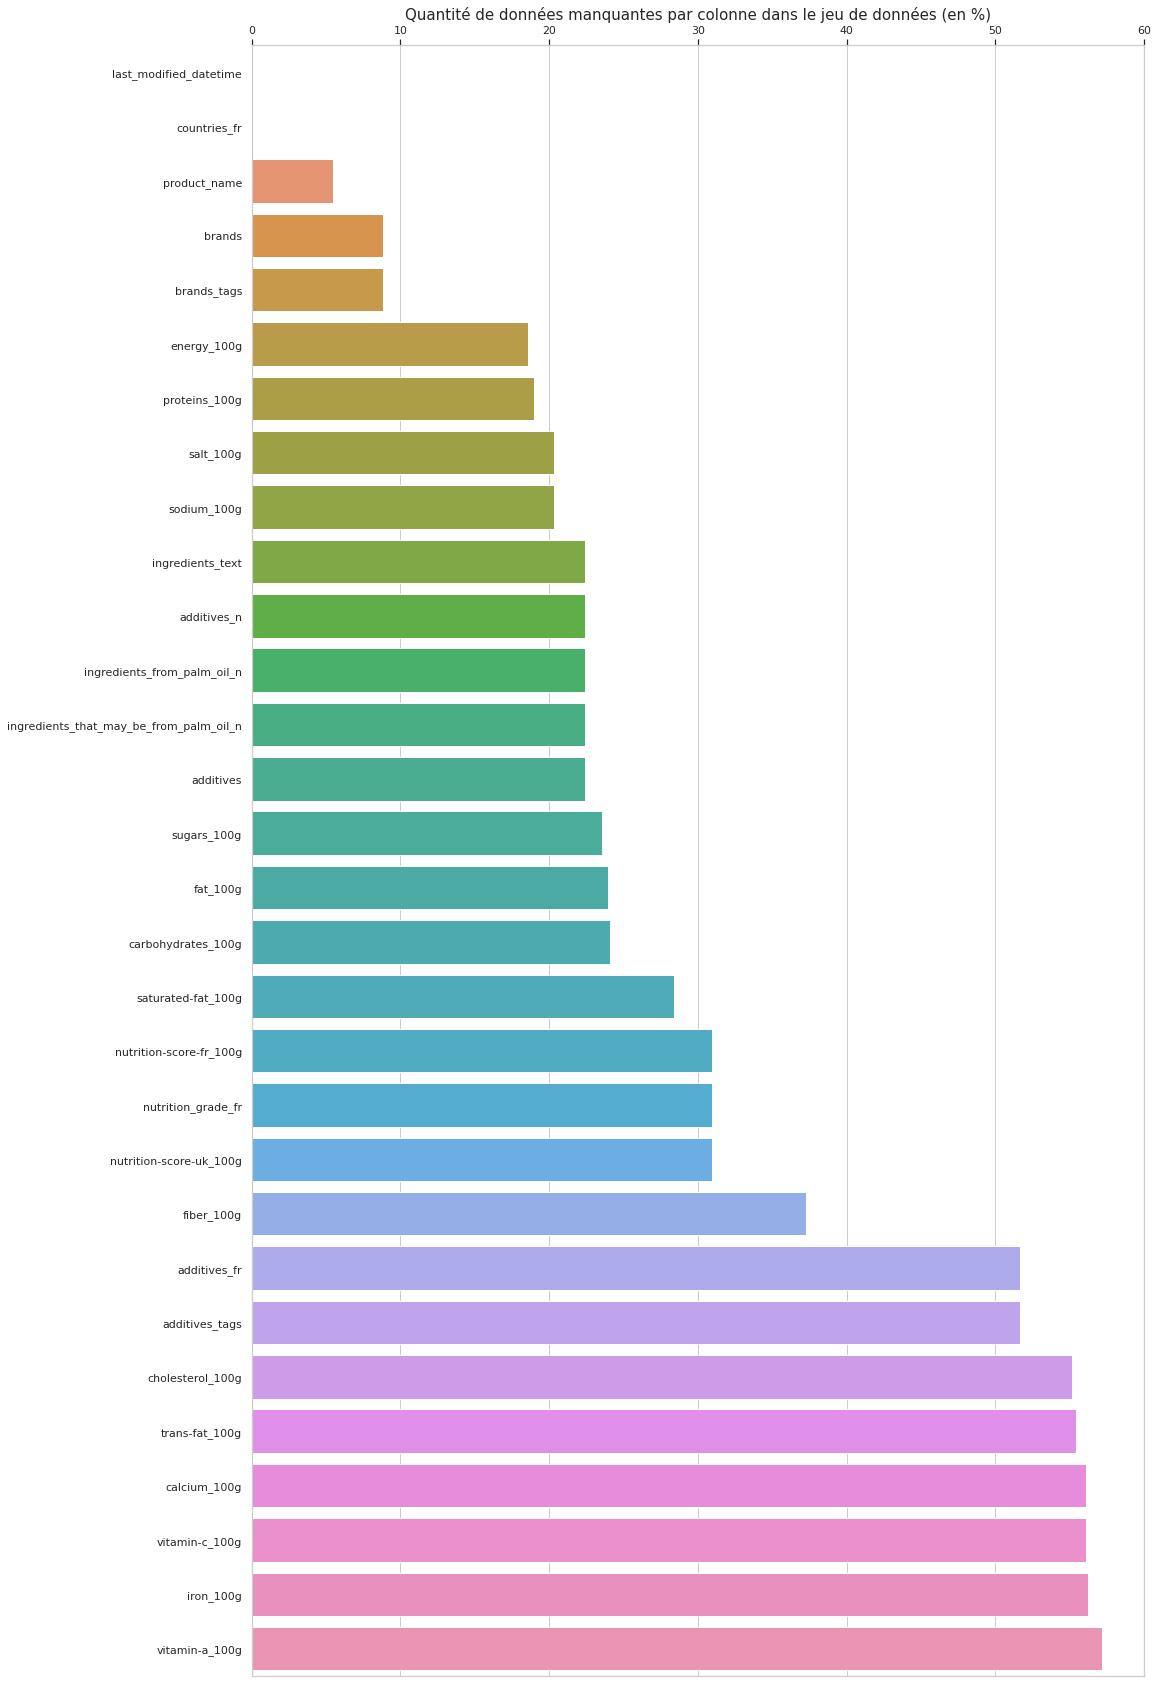

In [16]:
proportion_nan_clean01 = df_raw_data.isna().sum().divide(df_raw_data.shape[0]/100).sort_values(ascending=True)
# Visualisation graphique du taux de remplissage  
sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_nan_clean01.index, x=proportion_nan_clean01.values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le jeu de données (en %)', size=15)
plt.show()

Le choix du dataset dde travail suivant est fait en tenant compte de la nature de notre application qui consiste à prédire le score de nutrition `nutrition-score-fr` puis de préconiser un autre aliment de la même catégorie ayant de meilleurs valeurs nutritionnelles.

En effet, notre application prédira le score nutrititif, il a été décidé de supprimer les données sans cette variable.

In [17]:
# Choix du dataset de travail
df_nan = df_raw_data[df_raw_data['nutrition-score-fr_100g'].isna()] 
df_raw_data = df_raw_data[df_raw_data['nutrition-score-fr_100g'].notna()]

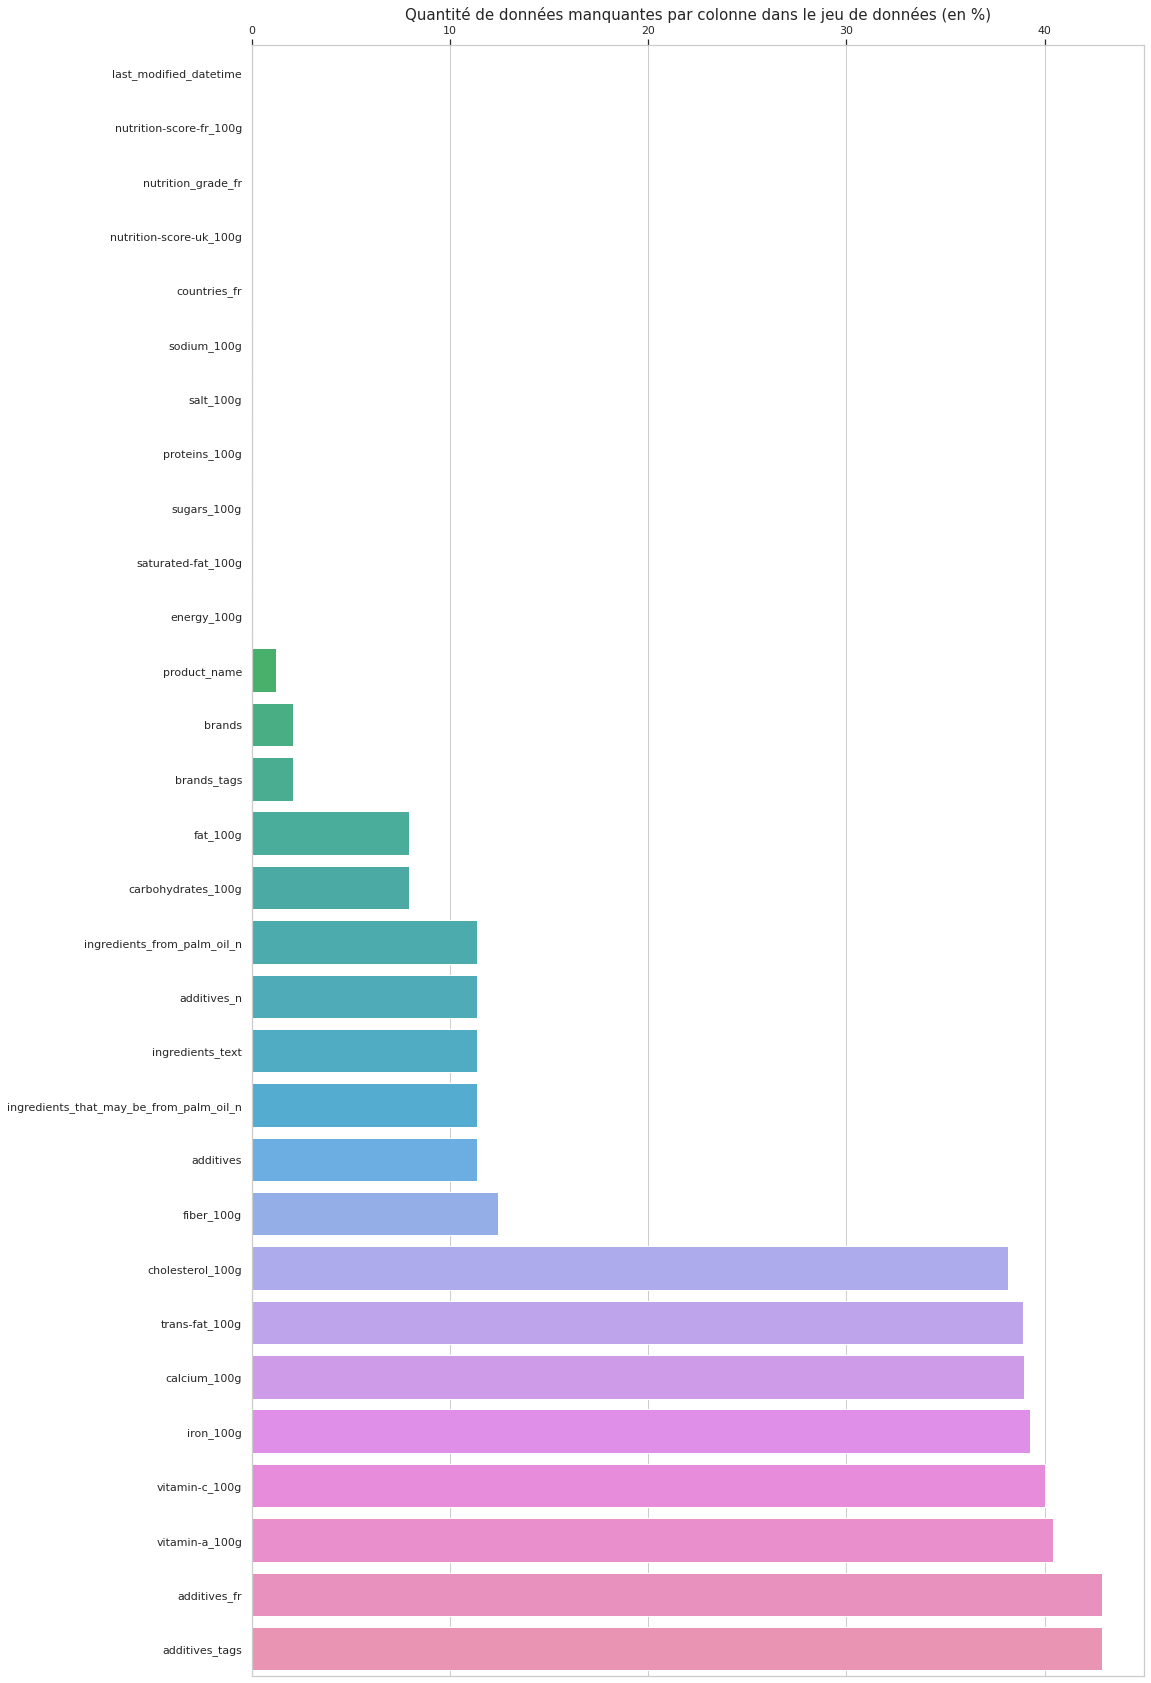

In [18]:
proportion_nan_clean02 = df_raw_data.isna().sum().divide(df_raw_data.shape[0]/100).sort_values(ascending=True)
# Visualisation graphique du taux de remplissage  
sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_nan_clean02.index, x=proportion_nan_clean02.values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le jeu de données (en %)', size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


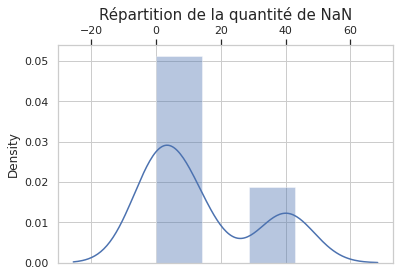

In [19]:
sns.set(style="whitegrid")
ax = sns.distplot(proportion_nan_clean02.values)
ax.xaxis.set_ticks_position('top')
plt.title('Répartition de la quantité de NaN', size=15)
plt.show()

In [20]:
count_null_values = df_raw_data.isna().sum().values
count_null = {'variables': df_raw_data.columns.values.tolist(),
              'count_null': count_null_values,
              'count_null_percentage':count_null_values/df_raw_data.shape[0]}
count_null = pd.DataFrame(data=count_null)
count_null

,variables,count_null,count_null_percentage
0,last_modified_datetime,0,0.000000
1,product_name,2738,0.012438
2,brands,4623,0.021001
3,brands_tags,4624,0.021006
4,countries_fr,57,0.000259
5,ingredients_text,25009,0.113610
6,additives_n,25009,0.113610
7,additives,25030,0.113706
8,additives_tags,94415,0.428906
9,additives_fr,94415,0.428906


In [21]:
# IMPUTATION DES DONNEES MANQUENTES POUR LES TYPES objects
df_raw_data.countries_fr.fillna('Inconnu', inplace=True)
df_raw_data.product_name.fillna('Inconnu', inplace=True)
df_raw_data.brands.fillna('Inconnu', inplace=True)
df_raw_data.brands_tags.fillna('Inconnu', inplace=True)
df_raw_data.additives_tags.fillna('Inconnu', inplace=True)
df_raw_data.additives_fr.fillna('Inconnu', inplace=True)
df_raw_data.ingredients_text.fillna('Inconnu', inplace=True)
#df_raw_data.serving_size.fillna('Inconnu', inplace=True) 

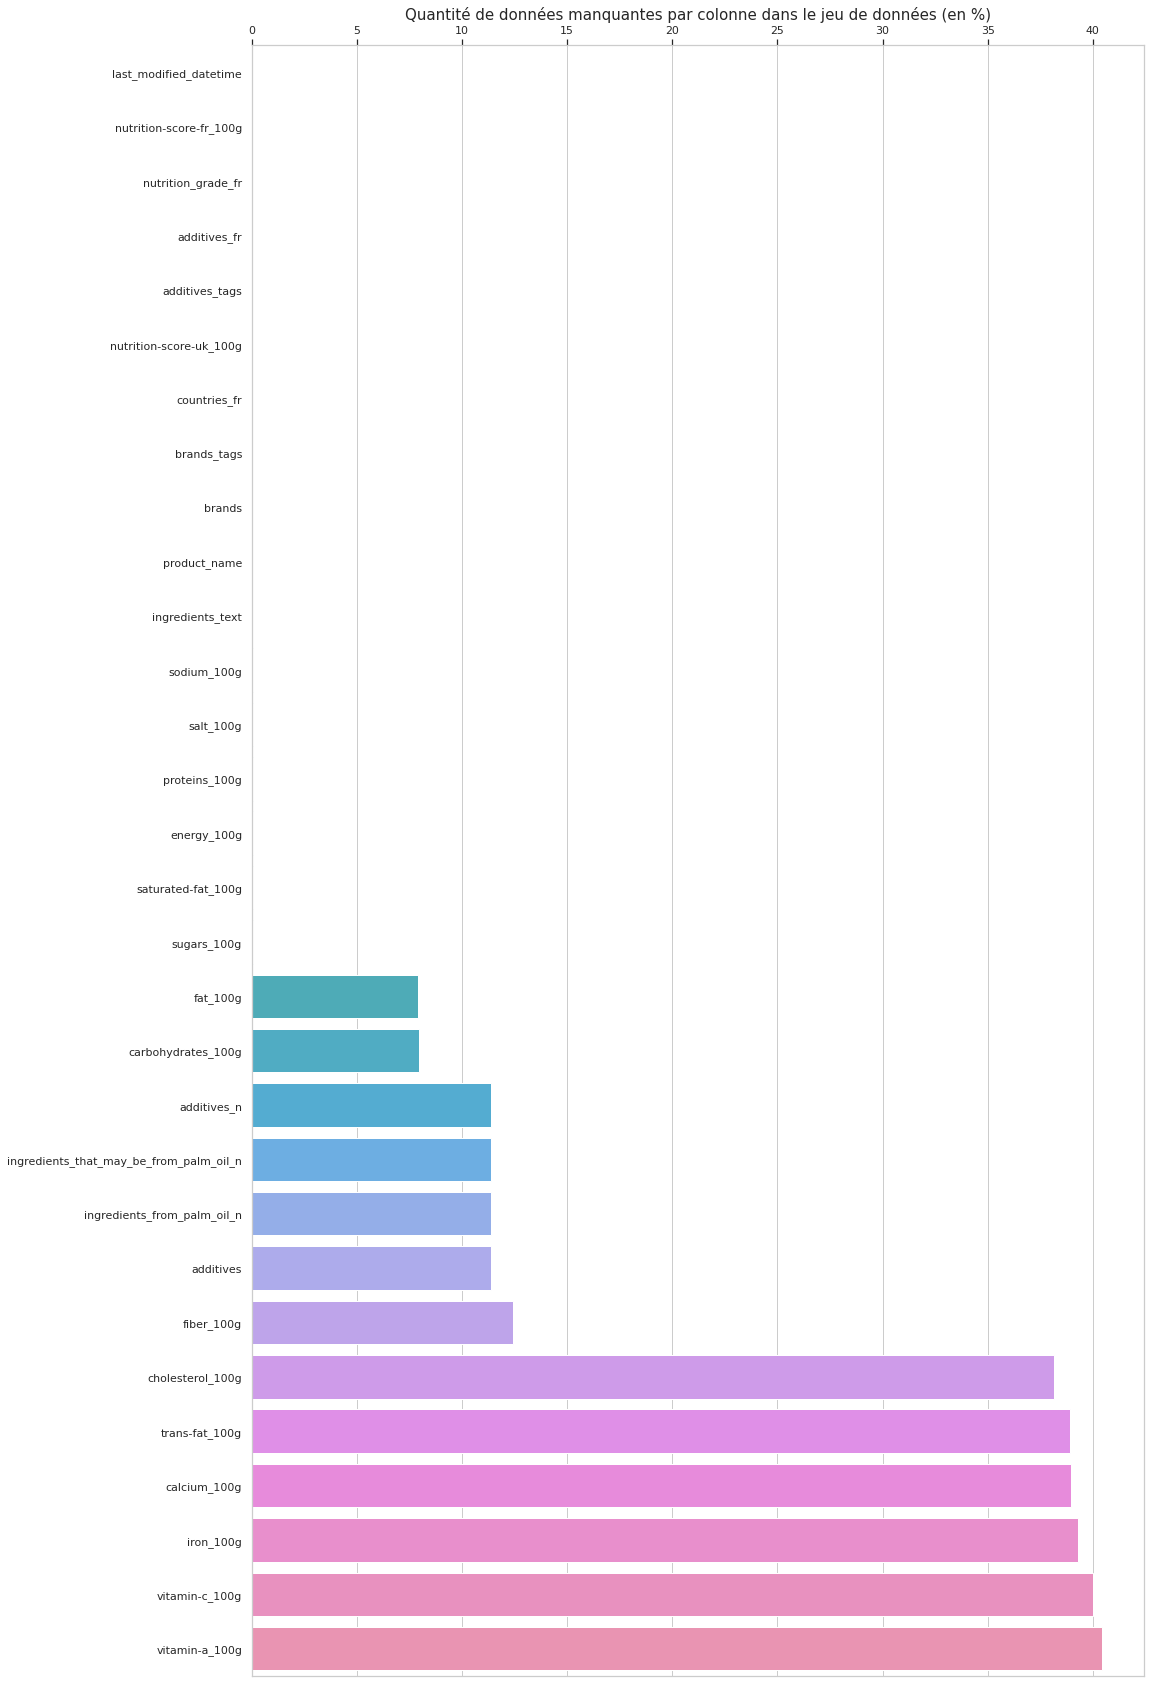

In [22]:
proportion_nan_clean03 = df_raw_data.isna().sum().divide(df_raw_data.shape[0]/100).sort_values(ascending=True)
# Visualisation graphique du taux de remplissage  
sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_nan_clean03.index, x=proportion_nan_clean03.values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le jeu de données (en %)', size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


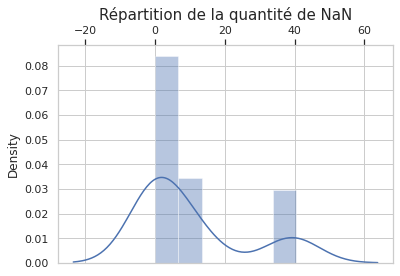

In [23]:
sns.set(style="whitegrid")
ax = sns.distplot(proportion_nan_clean03.values)
ax.xaxis.set_ticks_position('top')
plt.title('Répartition de la quantité de NaN', size=15)
plt.show()

In [25]:
data_cleaned = df_raw_data.dropna()

In [27]:
data_cleaned.dtypes

last_modified_datetime                     datetime64[ns, UTC]
product_name                               object             
brands                                     object             
brands_tags                                object             
countries_fr                               object             
ingredients_text                           object             
additives_n                                category           
additives                                  object             
additives_tags                             object             
additives_fr                               object             
ingredients_from_palm_oil_n                category           
ingredients_that_may_be_from_palm_oil_n    category           
nutrition_grade_fr                         category           
energy_100g                                float64            
fat_100g                                   float64            
saturated-fat_100g                         float64     

In [28]:
data_cleaned.to_csv(ROOT_DIR + 'data/fr_openfoodfacts_org_products_cleaned2.csv',sep="\t",encoding='utf-8', index=False)
res = data_cleaned.dtypes.to_frame('dtypes').reset_index()
types = res.to_csv(ROOT_DIR + 'data/dtypes.csv', index=False)

## DATA ANALYSIS

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions_project03
sns.set()
%matplotlib inline

unzipfilename = "fr_openfoodfacts_org_products_cleaned2.csv"
filepath =  "C:/Users/stela/OneDrive/Documents/formation_en_cours/OPENCLASSSROOMS/INGENIEUR_IA/PROJET_03/data/"+unzipfilename
# figures saving
if not os.path.exists("figures"):
    os.mkdir("figures")

In [ ]:
data = pd.read_csv(filepath, sep="\t", header=0, encoding='utf-8')
data.head(3) 

,last_modified_datetime,product_name,brands,brands_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,2017-03-09 14:32:37+00:00,Banana Chips Sweetened (Whole),Inconnu,Inconnu,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -> en:vegetable-oil ] [ oil -> en:oil ] [ coconut-oil -> en:coconut-oil ] [ oil -> en:oil ] [ corn-oil-and-or-palm-oil-sugar -> en:corn-oil-and-or-palm-oil-sugar ] [ oil-and-or-palm-oil-sugar -> en:oil-and-or-palm-oil-sugar ] [ and-or-palm-oil-sugar -> en:and-or-palm-oil-sugar ] [ or-palm-oil-sugar -> en:or-palm-oil-sugar ] [ palm-oil-sugar -> en:palm-oil-sugar ] [ oil-sugar -> en:oil-sugar ] [ sugar -> en:sugar ] [ natural-banana-flavor -> en:natural-banana-flavor ] [ banana-flavor -> en:banana-flavor ] [ flavor -> en:flavor ],Inconnu,Inconnu,0.0,0.0,d,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.000,0.00,0.0,0.0214,0.000,0.00129,14.0,14.0
1,2017-03-09 14:32:37+00:00,Peanuts,Torn & Glasser,torn-glasser,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> en:wheat-flour ] [ flour -> en:flour ] [ sugar -> en:sugar ] [ rice-flour -> en:rice-flour ] [ flour -> en:flour ] [ tapioca-starch -> en:tapioca-starch ] [ starch -> en:starch ] [ salt -> en:salt ] [ leavening -> en:leavening ] [ ammonium-bicarbonate -> en:ammonium-bicarbonate ] [ bicarbonate -> en:bicarbonate ] [ baking-soda -> en:baking-soda ] [ soda -> en:soda ] [ soy-sauce -> en:soy-sauce ] [ sauce -> en:sauce ] [ water -> en:water ] [ soybeans -> en:soybeans ] [ wheat -> en:wheat ] [ salt -> en:salt ] [ potato-starch -> en:potato-starch ] [ starch -> en:starch ],Inconnu,Inconnu,0.0,0.0,b,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.635,0.25,0.0,0.0000,0.071,0.00129,0.0,0.0
2,2017-03-09 09:07:05+00:00,Granola Cranberry And Acai,Viva La Salud,viva-la-salud,États-Unis,"Whole rolled oats, milled cane sugar, vegetable oil (canola and/or safflower and/or sunflower oil), rice flour, constarch, dried cranberries (cranberries, sugar, sunflower oil), natural flavor, salt, barley malt syrup, acai berry.",55 g (0.5 cup),0.0,[ whole-rolled-oats -> en:whole-rolled-oats ] [ rolled-oats -> en:rolled-oats ] [ oats -> en:oats ] [ milled-cane-sugar -> en:milled-cane-sugar ] [ cane-sugar -> en:cane-sugar ] [ sugar -> en:sugar ] [ vegetable-oil -> en:vegetable-oil ] [ oil -> en:oil ] [ canola-and-or-safflower-and-or-sunflower-oil -> en:canola-and-or-safflower-and-or-sunflower-oil ] [ and-or-safflower-and-or-sunflower-oil -> en:and-or-safflower-and-or-sunflower-oil ] [ or-safflower-and-or-sunflower-oil -> en:or-safflower-and-or-sunflower-oil ] [ safflower-and-or-sunflower-oil -> en:safflower-and-or-sunflower-oil ] [ and-or-sunflower-oil -> en:and-or-sunflower-oil ] [ or-sunflower-oil -> en:or-sunflower-oil ] [ sunflower-oil -> en:sunflower-oil ] [ oil -> en:oil ] [ rice-flour -> en:rice-flour ] [ flour -> en:flour ] [ constarch -> en:constarch ] [ dried-cranberries -> en:dried-cranberries ] [ cranberries -> en:cranberries ] [ cranberries -> en:cranberries ] [ sugar -> en:sugar ] [ sunflower-oil -> en:sunflower-oil ] [ oil -> en:oil ] [ natural-flavor -> en:natural-flavor ] [ flavor -> en:flavor ] [ salt -> en:salt ] [ barley-malt-syrup -> en:barley-malt-syrup ] [ malt-syrup -> en:malt-syrup ] [ syrup -> en:syrup ] [ acai-berry -> en:acai-berry ] [ berry -> en:berry ],Inconnu,Inc

### Correction des types de données

In [ ]:
data = functions_project03.nettoyage_categorie(data)
data.dtypes

last_modified_datetime                     object  
product_name                               object  
brands                                     object  
brands_tags                                object  
countries_fr                               object  
ingredients_text                           object  
serving_size                               category
additives_n                                category
additives                                  object  
additives_tags                             object  
additives_fr                               object  
ingredients_from_palm_oil_n                category
ingredients_that_may_be_from_palm_oil_n    category
nutrition_grade_fr                         category
energy_100g                                float64 
fat_100g                                   float64 
saturated-fat_100g                         float64 
trans-fat_100g                             float64 
cholesterol_100g                           float64 
carbohydrate

## QUESTION 2

Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.


### Analyse Univariée
Distribution

In [ ]:
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


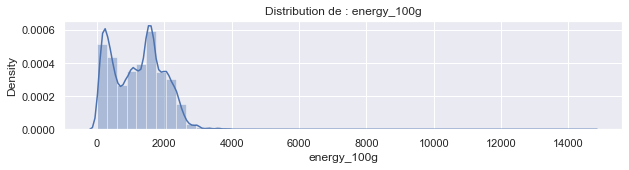

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


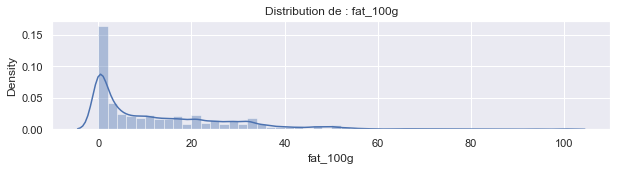

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


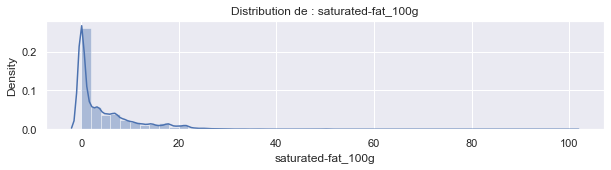

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


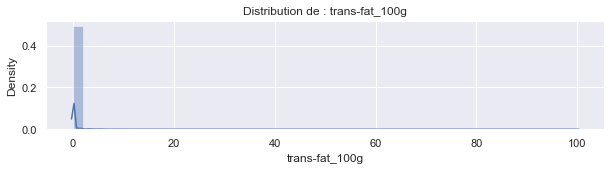

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


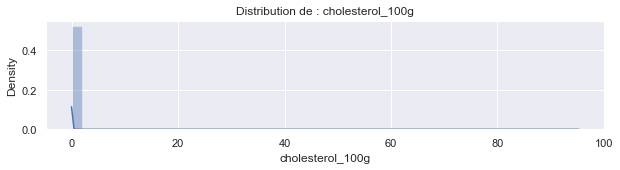

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


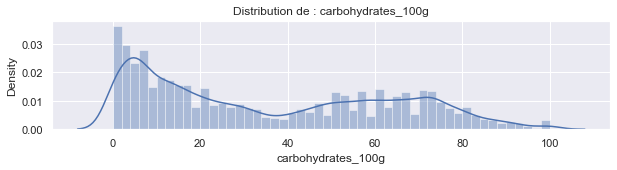

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


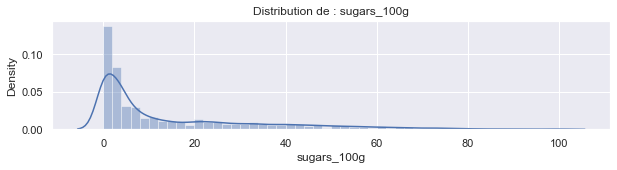

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


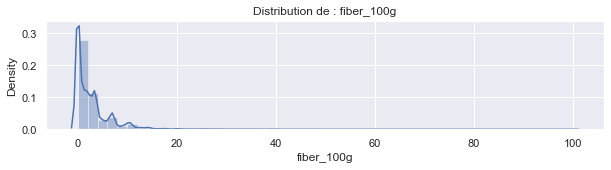

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


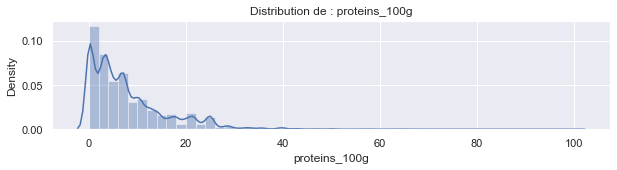

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


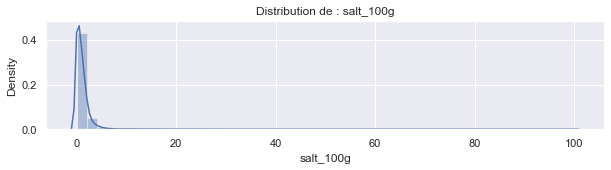

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


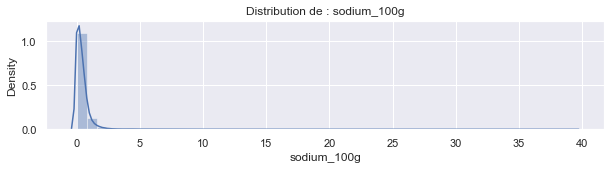

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


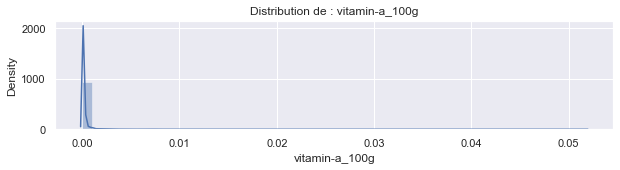

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


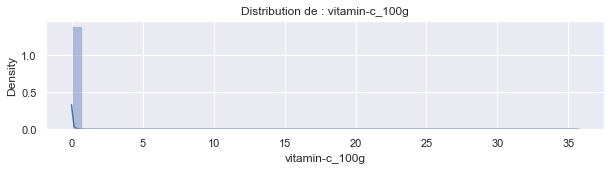

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


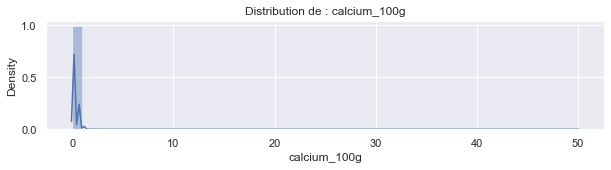

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


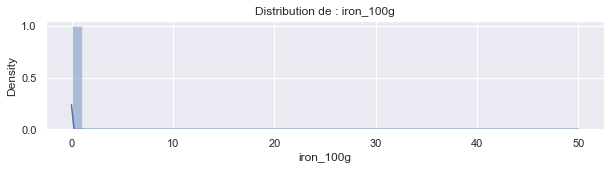

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


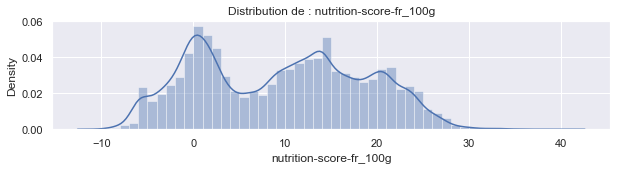

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


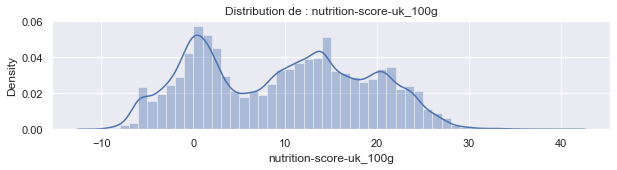

In [ ]:
for column in numeric_columns:
    plt.figure(figsize = (10,2))
    sns.set(font_scale=1)
    sns.distplot(data[column], bins=50)
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()

### Analyse des outliers

In [ ]:
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
data[numeric_columns].describe()

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,126052.000000,126052.000000,126052.000000,126052.000000,126052.000000,126052.000000,126052.000000,126052.000000,126052.000000,126052.000000,126052.000000,126052.000000,126052.000000,126052.000000,126052.000000,126052.000000,126052.000000
mean,1213.712654,13.392283,4.714618,0.062489,0.017926,35.538583,15.390254,2.858199,7.962116,1.273147,0.501239,0.000131,0.006071,0.091616,0.002413,9.397899,9.396741
std,746.915646,15.491945,6.851867,0.926940,0.270408,28.180775,19.524821,4.406283,8.186011,3.617521,1.424205,0.000552,0.106512,0.233121,0.149649,9.038130,9.039353
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,-10.000000
25%,494.000000,0.820000,0.000000,0.000000,0.000000,9.090000,1.670000,0.000000,2.350000,0.142240,0.056000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1272.000000,7.775000,1.790000,0.000000,0.000000,28.570000,5.880000,1.500000,5.650000,0.741680,0.292000,0.000000,0.000000,0.035000,0.000960,10.000000,10.000000
75%,1761.000000,21.430000,7.140000,0.000000,0.019000,60.710000,24.290000,3.600000,10.840000,1.450340,0.571000,0.000100,0.002100,0.100000,0.002400,17.000000,17.000000
max,14644.000000,100.000000,100.000000,100.000000,95.238000,100.000000,100.000000,100.000000,100.000000,99.905820,39.333000,0.051818,35.714300,50.000000,50.000000,40.000000,40.000000


In [ ]:
# Visualisation et analyse des outliers : grandes valeurs plausibles
data[data["energy_100g"]==data["energy_100g"].max()]

,last_modified_datetime,product_name,brands,brands_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
46967,2017-03-09 13:20:13+00:00,Instant Aka Miso Soup,Kikkoman,kikkoman,États-Unis,"Red miso powder(soybeans, rice salt), dehydrated seaweed, dried wheat gluten , modified food starch, bonito powder(fish) , monosodium glutamate , glucose, dehydrated green onion, hydrolyzed protein [corn, wheat, soybeans, fish (bonito, horse mackerel, anchovy)], yeast extract, potassium chloride , disodium inosinte, disodium guanylate, dl-methionine, dipotassium phoshate, calcium lactate, flavorings.",10 g (10 g),4.0,[ red-miso-powder -> en:red-miso-powder ] [ miso-powder -> en:miso-powder ] [ powder -> en:powder ] [ soybeans -> en:soybeans ] [ rice-salt -> en:rice-salt ] [ salt -> en:salt ] [ dehydrated-seaweed -> en:dehydrated-seaweed ] [ seaweed -> en:seaweed ] [ dried-wheat-gluten -> en:dried-wheat-gluten ] [ wheat-gluten -> en:wheat-gluten ] [ gluten -> en:gluten ] [ modified-food-starch -> en:modified-food-starch ] [ food-starch -> en:food-starch ] [ starch -> en:starch ] [ bonito-powder -> en:bonito-powder ] [ powder -> en:powder ] [ fish -> en:fish ] [ monosodium-glutamate -> en:e621 -> exists -- ok ] [ glucose -> en:glucose ] [ dehydrated-green-onion -> en:dehydrated-green-onion ] [ green-onion -> en:green-onion ] [ onion -> en:onion ] [ hydrolyzed-protein -> en:hydrolyzed-protein ] [ protein -> en:protein ] [ corn -> en:corn ] [ wheat -> en:wheat ] [ soybeans -> en:soybeans ] [ fish -> en:fish ] [ bonito -> en:bonito ] [ horse-mackerel -> en:horse-mackerel ] [ mackerel -> en:mackerel ] [ anchovy -> en:anchovy ] [ yeast-extract -> en:yeast-extract ] [ extract -> en:extract ] [ potassium-chloride -> en:e508 -> exists -- ok ] [ disodium-inosinte -> en:disodium-inosinte ] [ inosinte -> en:inosinte ] [ disodium-guanylate -> en:e627 -> exists -- ok ] [ dl-methionine -> en:dl-methionine ] [ methionine -> en:methionine ] [ dipotassium-phoshate -> en:dipotassium-phoshate ] [ phoshate -> en:phoshate ] [ calcium-lactate -> en:e327 -> exists -- ok ] [ flavorings -> en:flavorings ],"en:e621,en:e508,en:e627,en:e327","E621 - Glutamate monosodique,E508 - Chlorure de potassium,E627 - Guanylate disodique,E327 - Lactate de calcium",0.0,0.0,e,14644.0,10.0,0.0,0.0,0.0,40.0,0.0,0.0,20.0,20.066,7.9,0.0,0.0,0.0,0.0,20.0,20.0


In [ ]:
data[data["saturated-fat_100g"]==data["saturated-fat_100g"].max()]

,last_modified_datetime,product_name,brands,brands_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
144806,2017-03-10 10:14:37+00:00,Coconut Oil,Desi,desi,États-Unis,Coconut oil,4 ml (1 tsp),0.0,[ coconut-oil -> en:coconut-oil ] [ oil -> en:oil ],Inconnu,Inconnu,0.0,0.0,e,3661.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,20.0,20.0
144807,2017-03-10 10:14:37+00:00,Coconut Oil,Desi,desi,États-Unis,Coconut oil,4 ml (1 tsp),0.0,[ coconut-oil -> en:coconut-oil ] [ oil -> en:oil ],Inconnu,Inconnu,0.0,0.0,e,3661.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,20.0,20.0
163203,2017-03-09 20:09:28+00:00,"St. Jamaica, Coconut Oil",St Jamaica Legend,st-jamaica-legend,États-Unis,Pure coconut oil,1 g (0.25 tsp),0.0,[ pure-coconut-oil -> en:pure-coconut-oil ] [ coconut-oil -> en:coconut-oil ] [ oil -> en:oil ],Inconnu,Inconnu,0.0,0.0,e,4184.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.0,0.0,0.0,20.0,20.0


In [ ]:
data[data["fat_100g"]==data["fat_100g"].max()]

In [ ]:
data[data["trans-fat_100g"]==data["trans-fat_100g"].max()]

Après visualisation de certains outliers, il s'avère que ces outliers sont des données plausibles. Cependant leur rareté et leur valeur extrême biaisent toute analyse de variance et toute analyse prédictive. Il a donc été décidé de les analyser plus en profondeur.

### Traitement des outliers

In [ ]:
def delete_outliers_percentiles(dataframe):
    '''Suppression des outliers du centile extrême'''
    for column in dataframe.select_dtypes(include = ['int32','float64']).columns.tolist() :
        dataframe.loc[dataframe[column] > dataframe[column].quantile(0.995)] = np.nan
        dataframe.loc[dataframe[column] < dataframe[column].quantile(0.005)] = np.nan
        dataframe.loc[dataframe[column] < 0] = np.nan
    return dataframe

In [ ]:
# Identification des outliers et analyse comparative des distribution avec et sans ces outliers
energy_percentiles = delete_outliers_percentiles(data.copy()[['energy_100g']])
cholesterol_percentiles = delete_outliers_percentiles(data.copy()[['cholesterol_100g']])
transfat_percentiles = delete_outliers_percentiles(data.copy()[['trans-fat_100g']])
fat_percentiles = delete_outliers_percentiles(data.copy()[['fat_100g']])
saturatedfat_percentiles = delete_outliers_percentiles(data.copy()[['saturated-fat_100g']])
#outliers_percentiles = pd.concat([salt_percentiles, data['salt_100g']]).drop_duplicates(keep=False)

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution de 'cholesterol_100g' sans outliers")

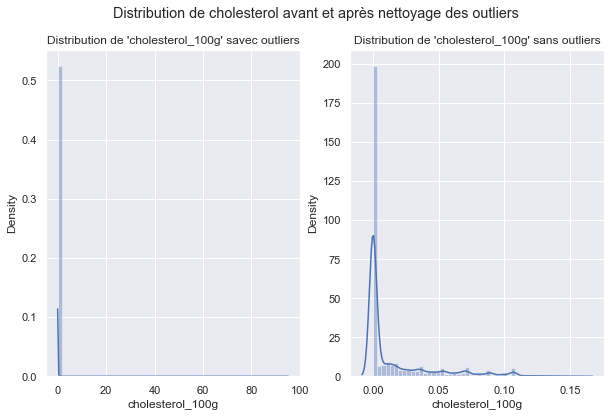

In [ ]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de cholesterol avant et après nettoyage des outliers")
ax1 = sns.distplot(data['cholesterol_100g'].dropna(), ax=axes[0])
ax1.set_title("Distribution de 'cholesterol_100g' savec outliers")
ax2 = sns.distplot(cholesterol_percentiles['cholesterol_100g'].dropna(), ax=axes[1])
ax2.set_title("Distribution de 'cholesterol_100g' sans outliers") 

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution de 'energy_100g' sans outliers")

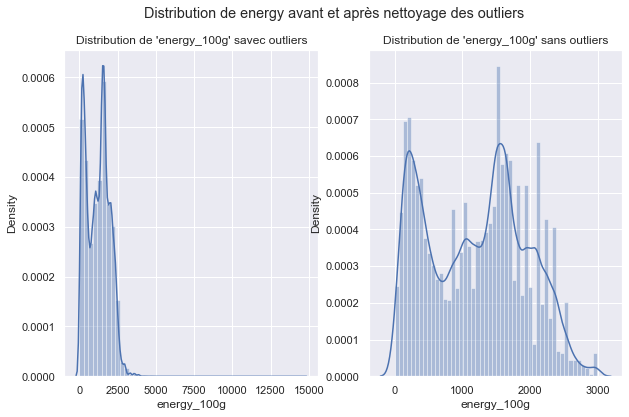

In [ ]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de energy avant et après nettoyage des outliers")
ax1 = sns.distplot(data['energy_100g'].dropna(), ax=axes[0])
ax1.set_title("Distribution de 'energy_100g' savec outliers")
ax2 = sns.distplot(energy_percentiles['energy_100g'].dropna(), ax=axes[1])
ax2.set_title("Distribution de 'energy_100g' sans outliers") 

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution de 'trans-fat_100g' sans outliers")

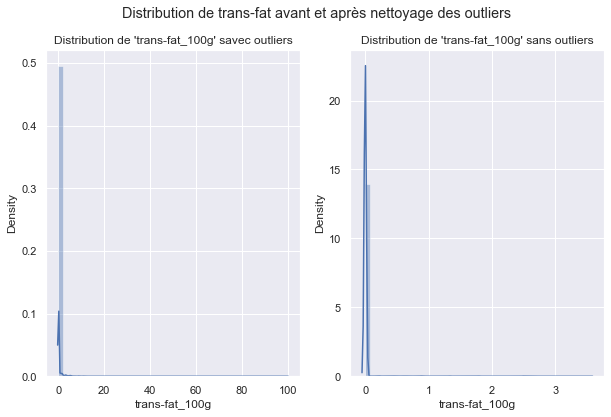

In [ ]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de trans-fat avant et après nettoyage des outliers")
ax1 = sns.distplot(data['trans-fat_100g'].dropna(), ax=axes[0])
ax1.set_title("Distribution de 'trans-fat_100g' savec outliers")
ax2 = sns.distplot(transfat_percentiles['trans-fat_100g'].dropna(), ax=axes[1])
ax2.set_title("Distribution de 'trans-fat_100g' sans outliers")

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution de 'saturated-fat_100g' sans outliers")

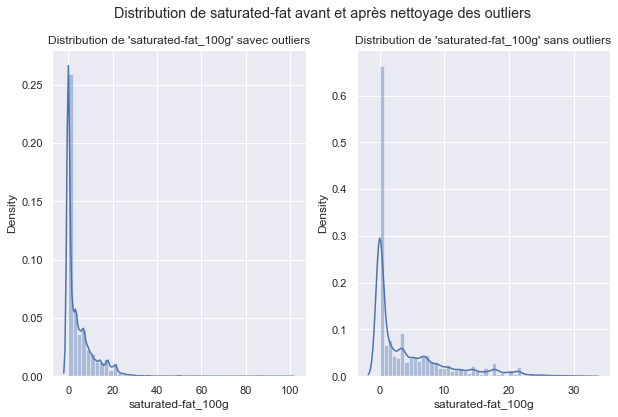

In [ ]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de saturated-fat avant et après nettoyage des outliers")
ax1 = sns.distplot(data['saturated-fat_100g'].dropna(), ax=axes[0])
ax1.set_title("Distribution de 'saturated-fat_100g' savec outliers")
ax2 = sns.distplot(saturatedfat_percentiles['saturated-fat_100g'].dropna(), ax=axes[1])
ax2.set_title("Distribution de 'saturated-fat_100g' sans outliers")

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution de 'fat_100g' sans outliers")

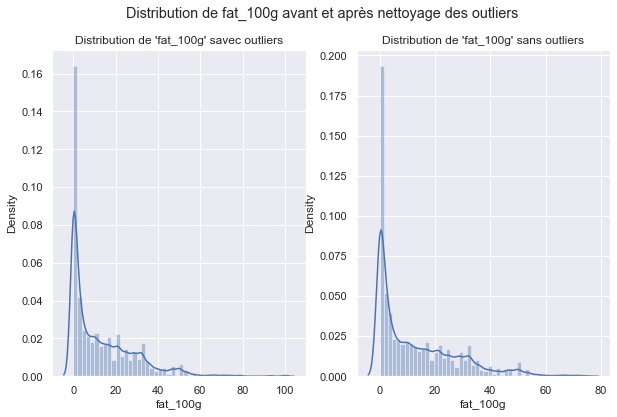

In [ ]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de fat_100g avant et après nettoyage des outliers")
ax1 = sns.distplot(data['fat_100g'].dropna(), ax=axes[0])
ax1.set_title("Distribution de 'fat_100g' savec outliers")
ax2 = sns.distplot(fat_percentiles['fat_100g'].dropna(), ax=axes[1])
ax2.set_title("Distribution de 'fat_100g' sans outliers")

Les outliers des variables energies et cholesterol sont retirées

In [ ]:
data['energy_100g'] = delete_outliers_percentiles(data.copy()[['energy_100g']])
data['cholesterol_100g'] = delete_outliers_percentiles(data.copy()[['cholesterol_100g']])
data['trans-fat_100g'] = delete_outliers_percentiles(data.copy()[['trans-fat_100g']])
data['fat_100g'] = delete_outliers_percentiles(data.copy()[['fat_100g']])
data['saturated-fat_100g'] = delete_outliers_percentiles(data.copy()[['saturated-fat_100g']])

data['fiber_100g'] = delete_outliers_percentiles(data.copy()[['fiber_100g']])
data['vitamin-c_100g'] = delete_outliers_percentiles(data.copy()[['vitamin-c_100g']])
data['vitamin-a_100g'] = delete_outliers_percentiles(data.copy()[['vitamin-a_100g']])
data['calcium_100g'] = delete_outliers_percentiles(data.copy()[['calcium_100g']])
data['iron_100g'] = delete_outliers_percentiles(data.copy()[['iron_100g']])
data['sugars_100g'] = delete_outliers_percentiles(data.copy()[['sugars_100g']])
data['salt_100g'] = delete_outliers_percentiles(data.copy()[['salt_100g']])
data['carbohydrates_100g'] = delete_outliers_percentiles(data.copy()[['carbohydrates_100g']])
data['proteins_100g'] = delete_outliers_percentiles(data.copy()[['proteins_100g']])
data = data.dropna()

In [ ]:
data.columns

Index(['last_modified_datetime', 'product_name', 'brands', 'brands_tags',
       'countries_fr', 'ingredients_text', 'serving_size', 'additives_n',
       'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')

#### Boites à moustaches

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


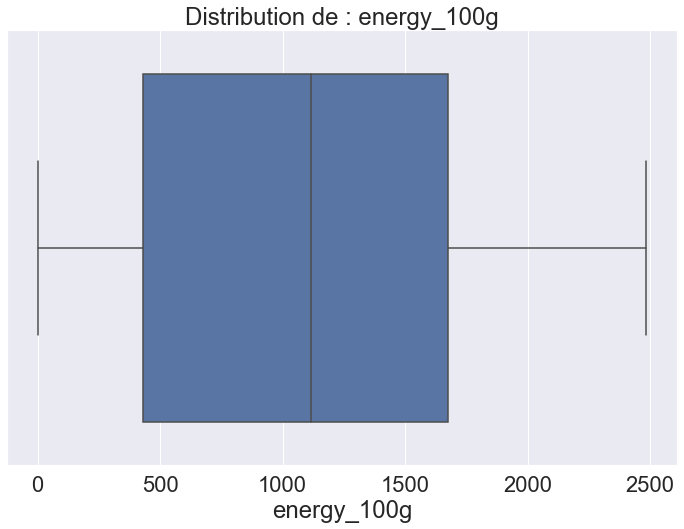

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


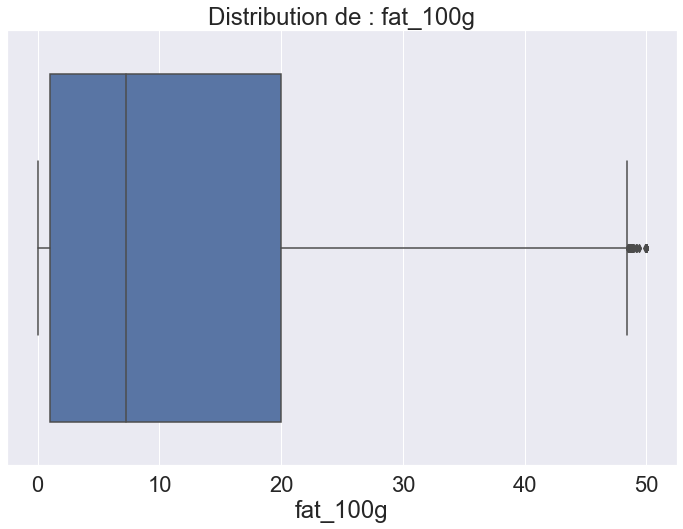

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


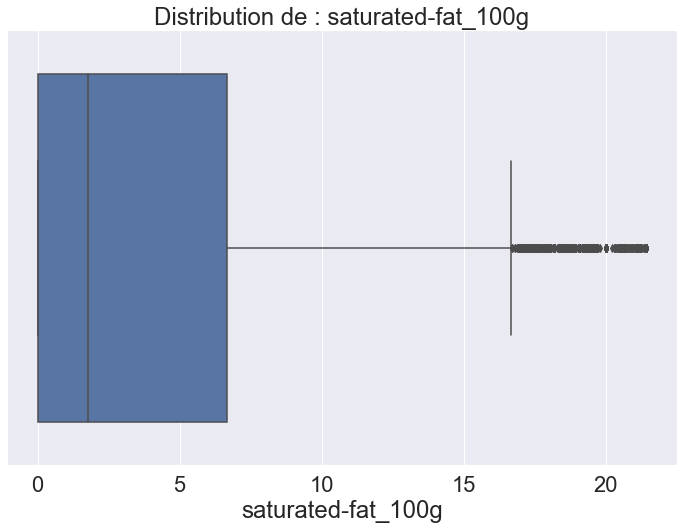

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


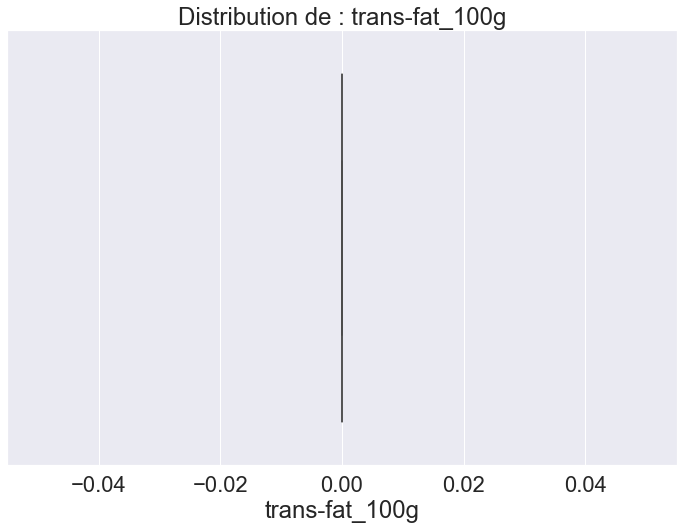

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


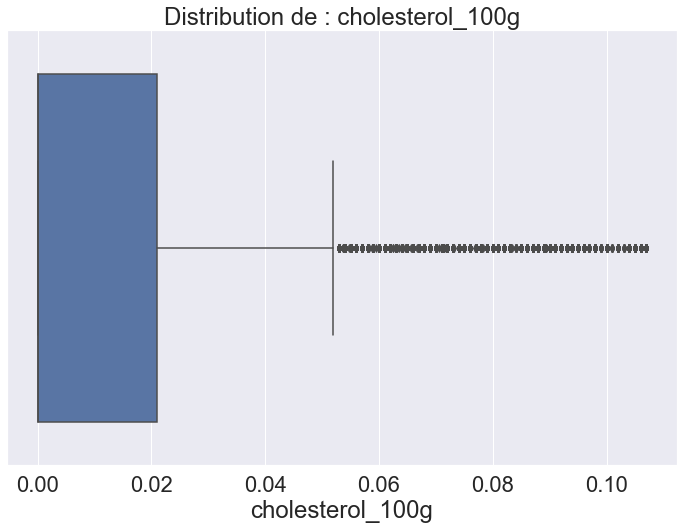

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


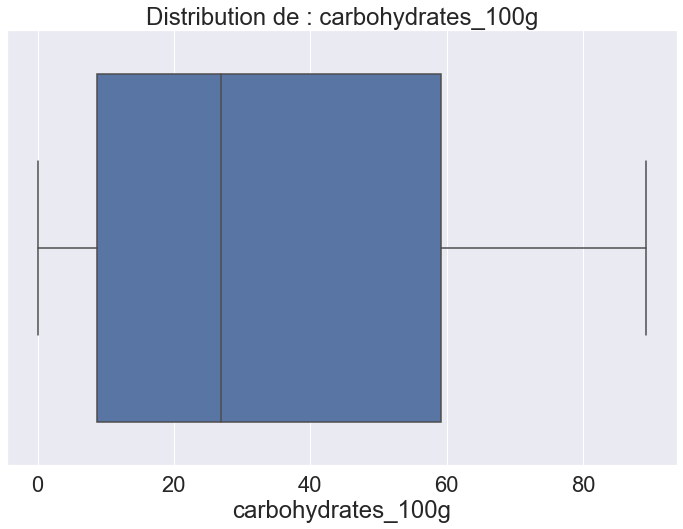

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


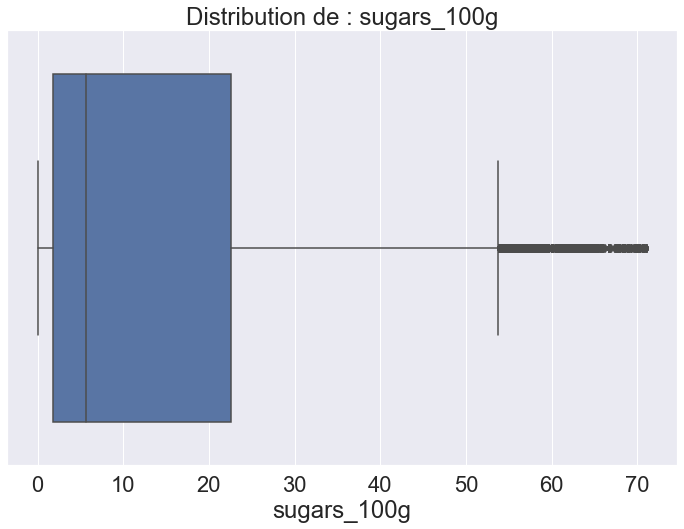

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


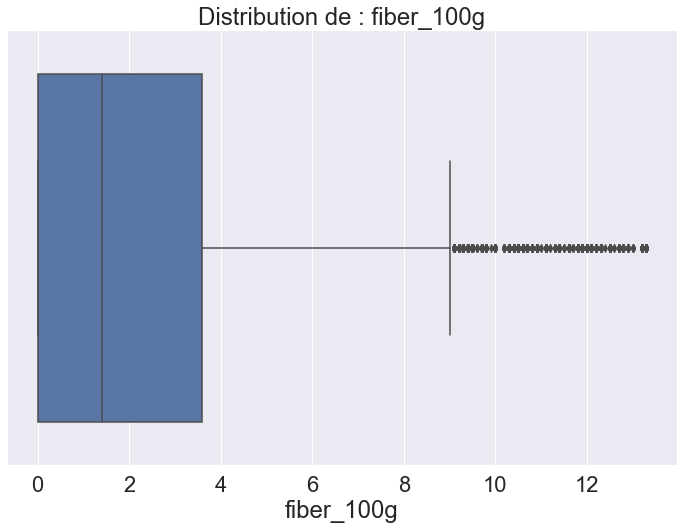

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


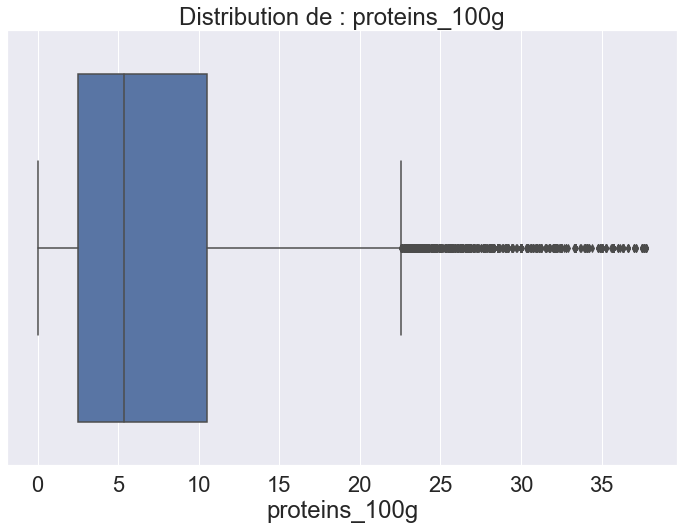

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


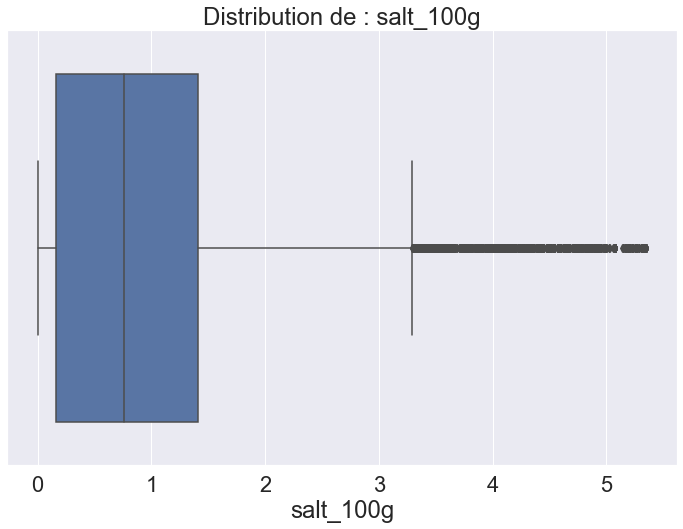

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


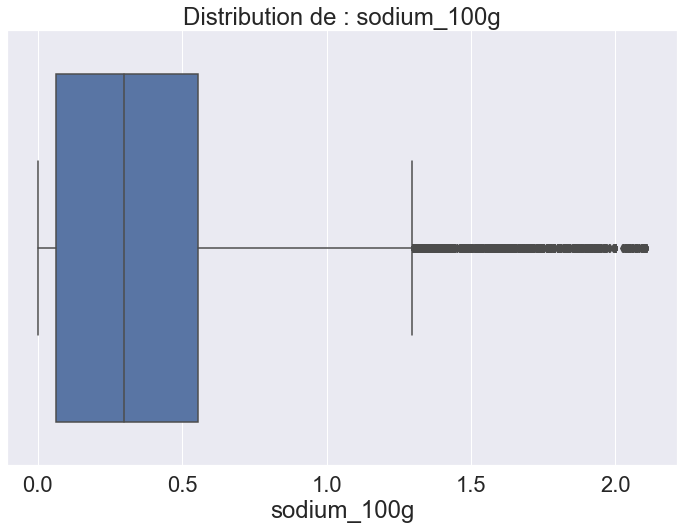

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


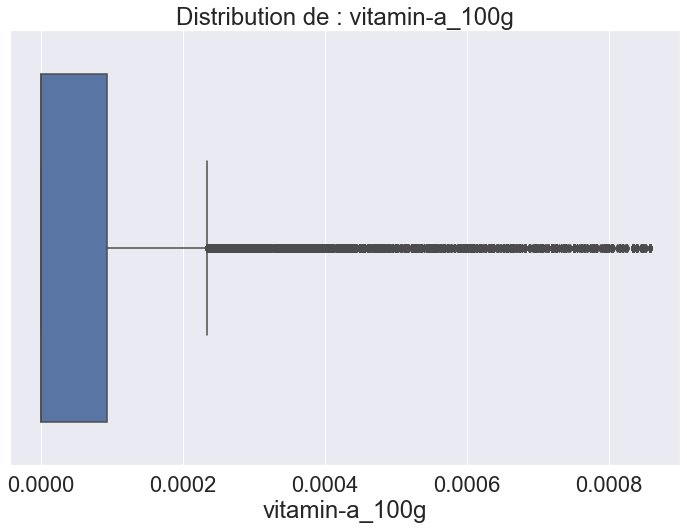

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


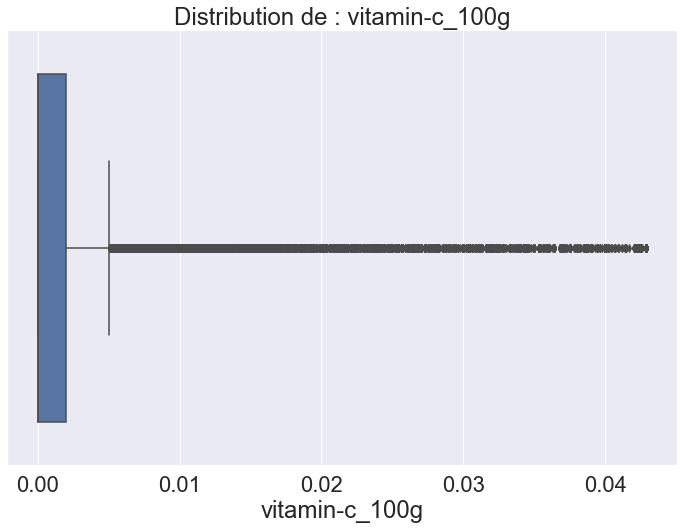

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


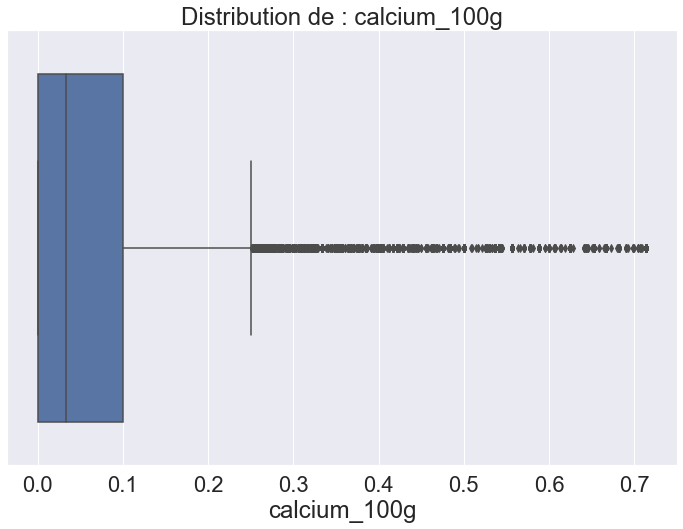

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


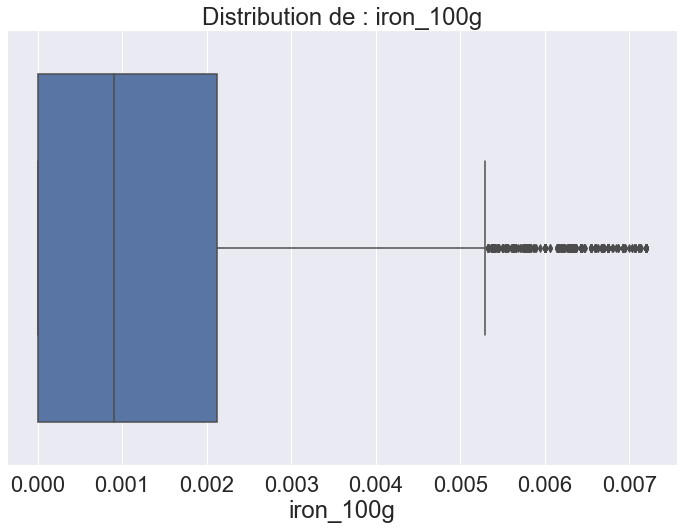

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


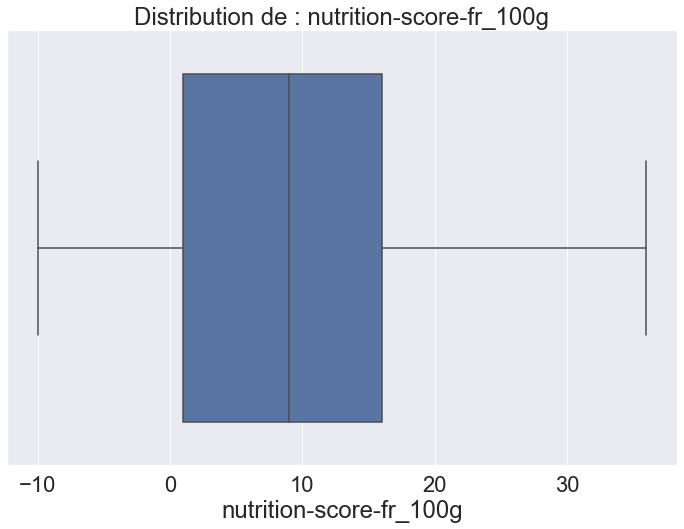

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


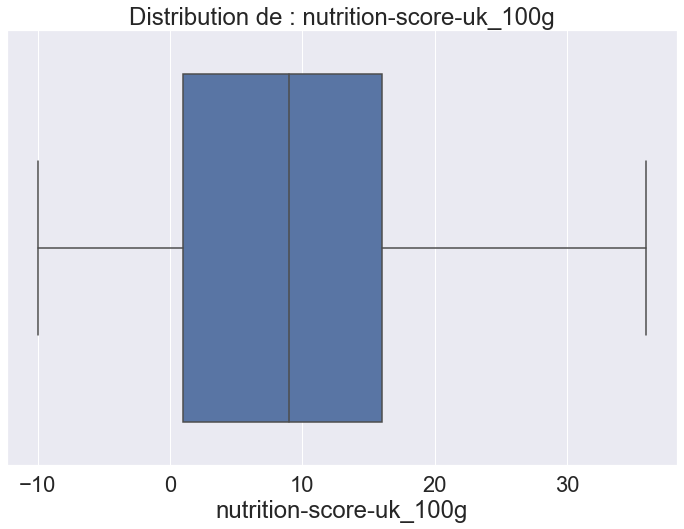

In [ ]:
sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (12,8))
    
    sns.boxplot(data[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

En observant les boxplot, on constate que les différentes variables ne semblent pas suivre une loi normale.

### Categorical data visualization

In [ ]:
categories_columns = data.select_dtypes(include = ['category']).columns

In [ ]:
def counter_words(labels, label_name):
    count = []; words = []
    for lab in labels:
        if lab not in words : 
            idx = len(count)
            words.append(lab)
            count.append(1)
        elif lab in words :
            for i,lab1 in enumerate(words):
                if lab1==lab:
                    idx = i
                    continue
            count[idx]+=1
    
    data = {label_name : words, label_name+'_count' : count}    
    return pd.DataFrame(data).sort_values(label_name+'_count', ascending=False)


In [ ]:
column="serving_size"
#data.url.dropna().apply(lambda x: str(x).split('/')[2]).unique()

<Figure size 1152x1440 with 0 Axes>

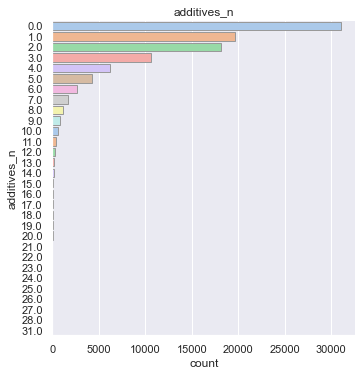

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<Figure size 1152x1440 with 0 Axes>

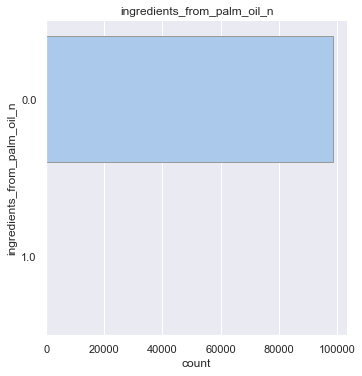

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<Figure size 1152x1440 with 0 Axes>

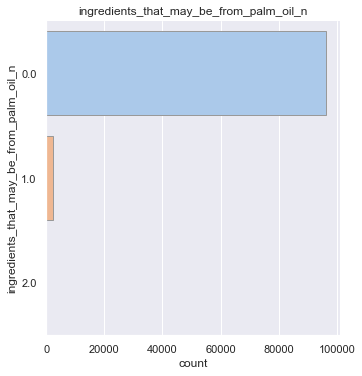

<Figure size 1152x1440 with 0 Axes>

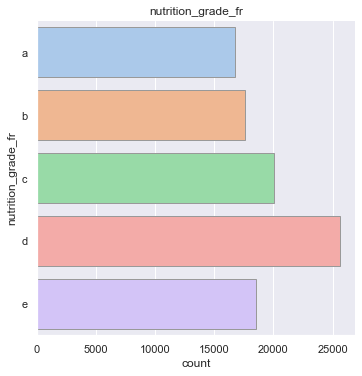

In [ ]:
for column in categories_columns:
    if (column!="serving_size"):
        plt.figure(figsize=(16,20))
        sns.catplot(y=column, kind="count",palette="pastel", edgecolor=".6",data=data)
        plt.title(column)
        plt.show()

<Figure size 1152x1440 with 0 Axes>

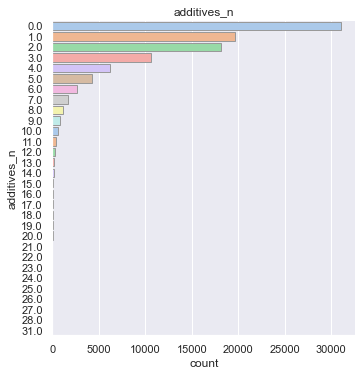

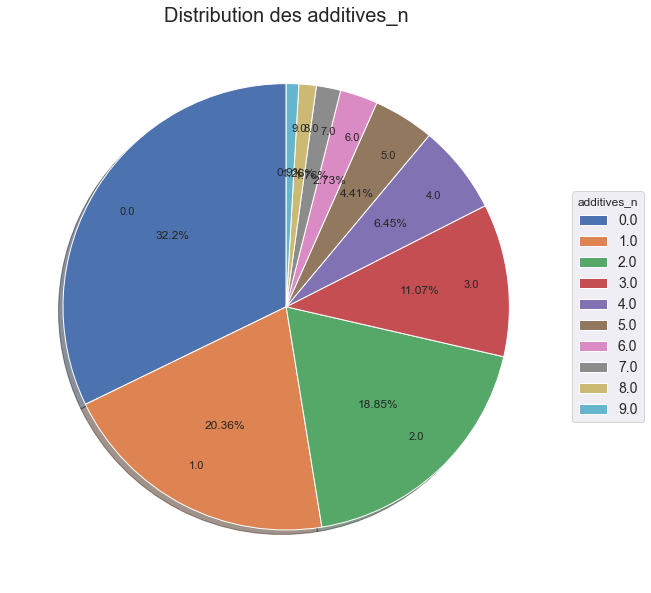

<Figure size 720x1440 with 0 Axes>

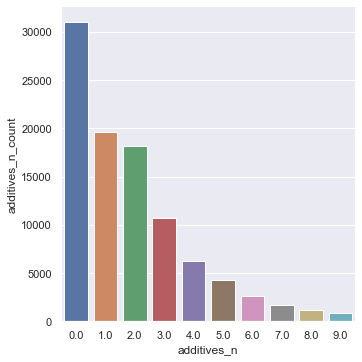

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<Figure size 1152x1440 with 0 Axes>

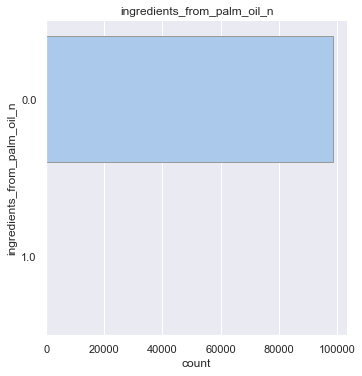

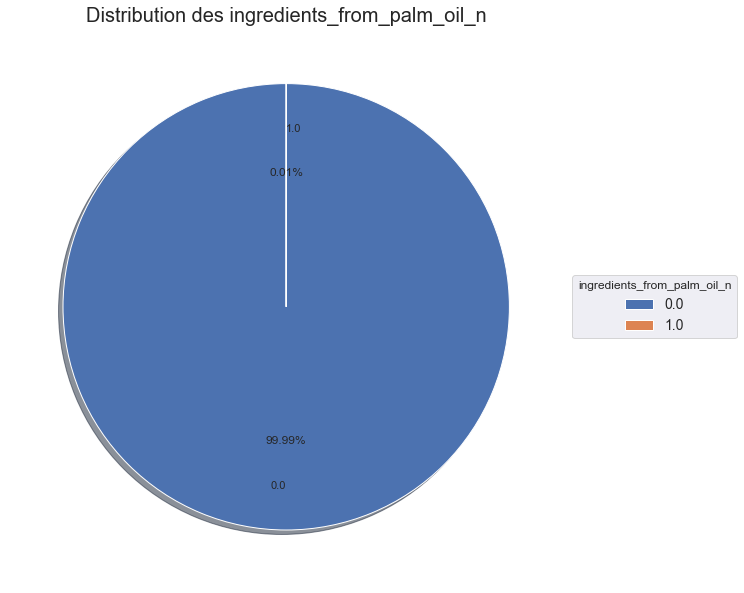

<Figure size 720x1440 with 0 Axes>

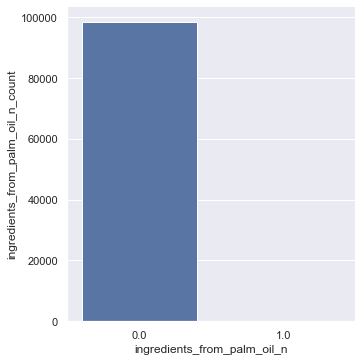

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<Figure size 1152x1440 with 0 Axes>

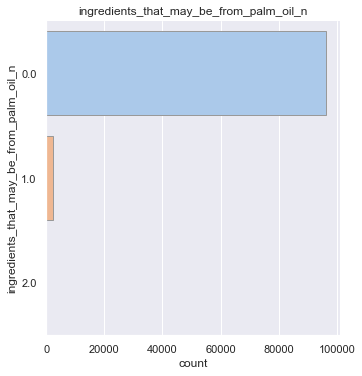

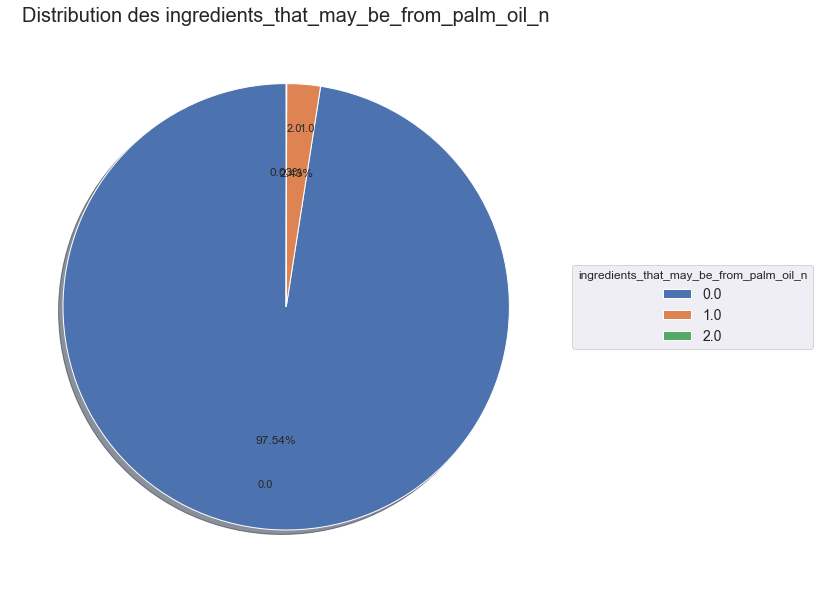

<Figure size 720x1440 with 0 Axes>

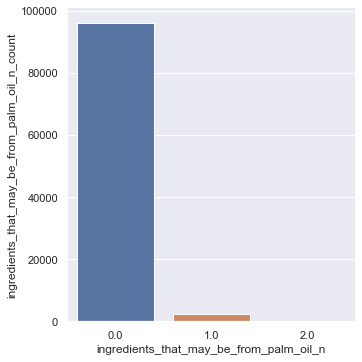

<Figure size 1152x1440 with 0 Axes>

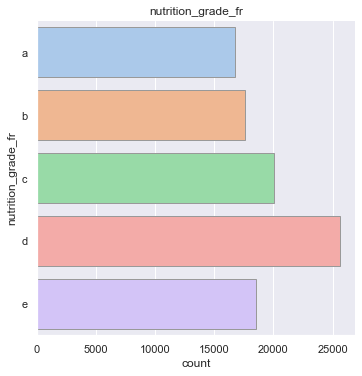

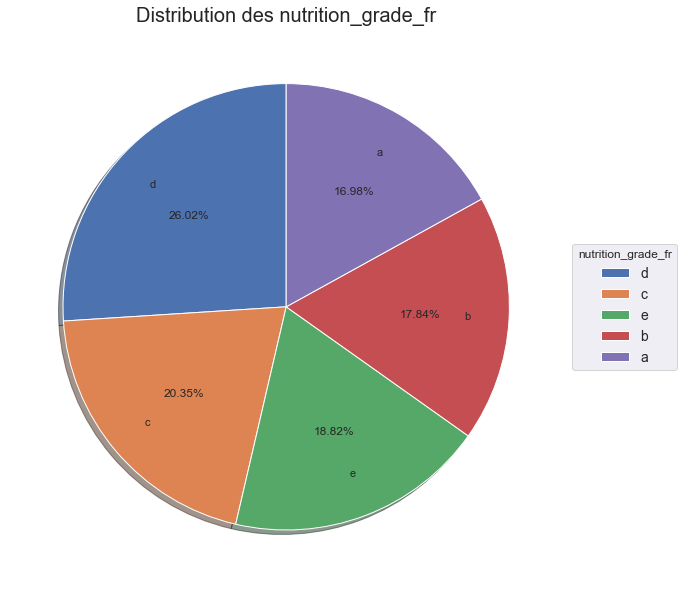

<Figure size 720x1440 with 0 Axes>

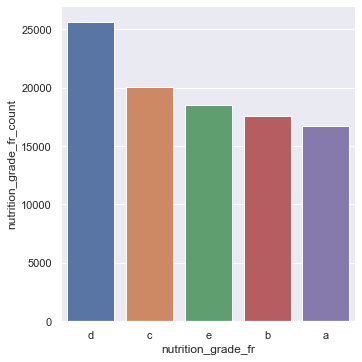

In [ ]:
for column in categories_columns:
    if (column!="serving_size"):
        plt.figure(figsize=(16,20))
        sns.catplot(y=column, kind="count",palette="pastel", edgecolor=".6",data=data)
        plt.title(column)
        plt.show()

        # Transformation & Visualisation of the data of the genre 
        df_column = counter_words(data[column], column )
        column_pie = df_column[column].values[:10].tolist()
        column_count_pie = df_column[column+"_count"].values[:10].tolist()
        column_dict = {column  : column_pie,
                            column+"_count" : column_count_pie}
        df_column_pie = pd.DataFrame(column_dict)
        #print(df_additives_n)

        # Visualization of the pie chart of the distribution 'genre des arbres' 
        plt.figure(figsize=(10,20))
        plt.title("Distribution des " + column,fontsize=20)
        wedges, texts, autotexts = plt.pie(df_column_pie[column+"_count"].values, labels = df_column_pie[column].values, normalize = True,
                                   autopct = lambda x: str(round(x, 2)) + '%', shadow = True, pctdistance = 0.6, 
                                   labeldistance = 0.8,startangle=90 )
        
        ax = plt.gca()
        ax.legend(wedges, data[column].value_counts().index,
          title=column, loc="center left", fontsize=14, bbox_to_anchor=(1, 0, 0.5, 1))
        plt.show()

        plt.figure(figsize=(10,20))
        sns.catplot(x=column, y=column+"_count", kind="bar", data=df_column_pie) 
        plt.show()
    

In [ ]:
# Conversion de la variable additives_n en type decimal
column = 'additives_n'
data[column]= data[column].astype('float64', errors="raise")
data[column].dtype

dtype('float64')

### description des données decimales

In [ ]:
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
data[numeric_columns].describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,98578.000000,98578.000000,98578.000000,98578.000000,98578.0,98578.000000,98578.000000,98578.000000,98578.000000,98578.000000,98578.000000,98578.000000,98578.000000,98578.000000,98578.000000,98578.000000,98578.000000,98578.000000
mean,2.097476,1120.898115,11.789222,4.193359,0.0,0.015671,33.972602,13.927736,2.268697,7.296632,0.950401,0.374173,0.000067,0.002826,0.078642,0.001291,8.777435,8.775548
std,2.577050,701.429535,12.495411,5.503683,0.0,0.026706,26.808247,16.955291,2.752368,6.818244,0.942175,0.370935,0.000121,0.006697,0.138463,0.001425,9.018015,9.019147
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,-10.000000
25%,0.000000,431.000000,1.040000,0.000000,0.0,0.000000,8.750000,1.750000,0.000000,2.500000,0.157480,0.062000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1117.000000,7.290000,1.760000,0.0,0.000000,26.885000,5.600000,1.400000,5.380000,0.762000,0.300000,0.000000,0.000000,0.033000,0.000900,9.000000,9.000000
75%,3.000000,1674.000000,20.000000,6.670000,0.0,0.021000,59.225000,22.580000,3.600000,10.530000,1.412240,0.556000,0.000094,0.002000,0.100000,0.002120,16.000000,16.000000
max,31.000000,2485.000000,50.000000,21.430000,0.0,0.107000,89.290000,71.050000,13.300000,37.780000,5.351780,2.107000,0.000857,0.042900,0.714000,0.007200,36.000000,36.000000


### Analyse bivariée

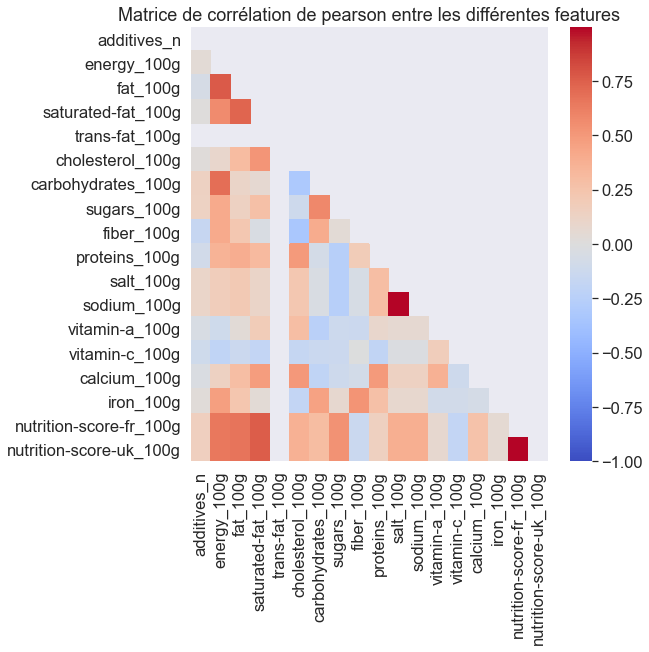

In [ ]:
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns

plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
plt.title('Matrice de corrélation de pearson entre les différentes features')

corr = data[numeric_columns].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, vmin=-1, cmap='coolwarm')
plt.show()
sns.set(font_scale=1)



* Analyse du tableau :

    * additives_n : legère correlation avec nutri-score-fr et nutri-score-uk , le sucre et les carbohydrates
    * energy_100g :  corrélation moyenne avec:
        * fat_100g
        * saturated-fat_100g
        * carbohydrates_100g
        * nutrition-score-fr_100g
    * fat_100g et saturated-fat_100g fortement corrélés

    * nutrition-score-fr_100g : forte corrélation avec:
        * saturated_fat_100g
        * energy_100g
        * fat_100g
        * nutrition-score-uk_100g

    * sugars_100g : forte correlation avec carbohydrates_100g.
    * sodium_100g correlation très forte avec salt_100g.
    * trans-fat_100g ne pésente aucune correlation avec les composantes.



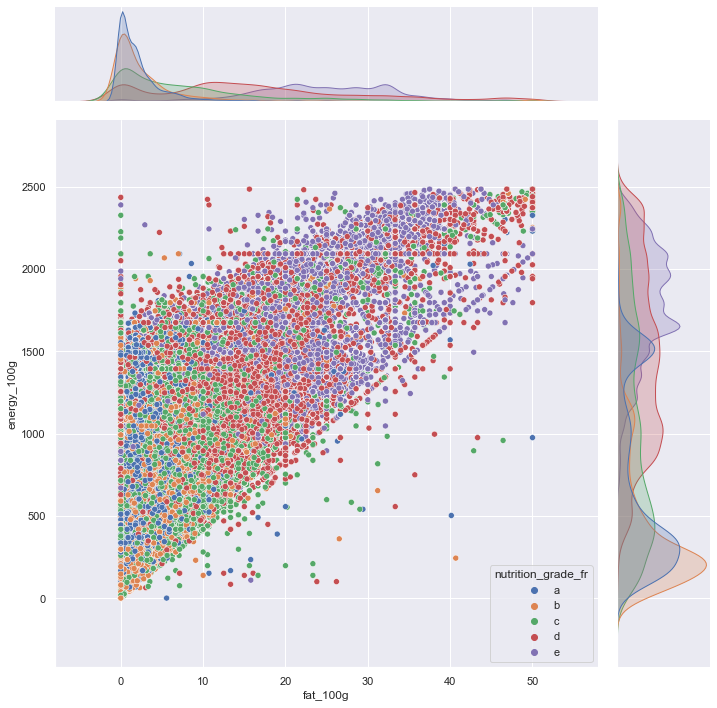

In [ ]:
fig1 = sns.jointplot(data=data,
    x="fat_100g", 
    y="energy_100g", 
    hue="nutrition_grade_fr",
    hue_order=['a', 'b', 'c', 'd','e'],
    height=10,
)

### Réduction de dimension par ACP / PCA

Fonction utilisée pour la réduction de dimension (projection sur un hyperplan de dimension n en maximisant la variance) https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
data_pca = data.select_dtypes(['float64','int32']).drop(["additives_n",'nutrition-score-uk_100g', 'nutrition-score-fr_100g','sodium_100g','trans-fat_100g'], axis=1).dropna()
colonnes_pca = data_pca.columns


In [ ]:
#on ramène nos données à une moyenne nulle et une variance de 1
scaler = StandardScaler()
data_pca = scaler.fit_transform(data_pca)

In [ ]:
pca = PCA(n_components = data_pca.shape[1])
pca.fit(data_pca)

PCA(n_components=13)

In [ ]:
pca.explained_variance_ratio_

array([0.27264523, 0.22384962, 0.11857855, 0.08664277, 0.07110009,
       0.05915708, 0.04283609, 0.0384041 , 0.02989165, 0.02365008,
       0.01993375, 0.01271893, 0.00059206])

In [ ]:
pca.singular_values_

array([591.09955366, 535.59912024, 389.82056762, 333.21752287,
       301.85387705, 275.3372849 , 234.29693649, 221.84541663,
       195.72064195, 174.09168383, 159.82922076, 127.66942894,
        27.54512174])


### Interprétation

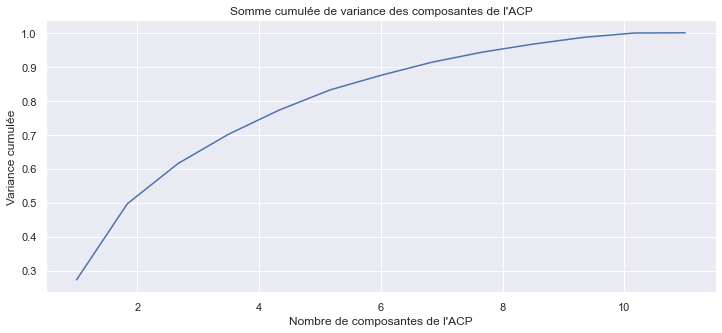

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(np.linspace(1, 11,13),
         np.cumsum(pca.explained_variance_ratio_))

On voit qu'à partir de 8 features on a une variance cumulée de plus de 93 %, 10 features la totalité de la variance est expliquée. On pourrait donc réduire notre jeu de données à 8 dimensions si on souhaitait gagner en temps de calcul / volume de données

In [ ]:
#pca.components_
pca.components_.shape

(13, 13)

Dans l'hypothèse où on ne retiendrait que les 2 composantes les plus explicatives, on obtient le plan factoriel ci-dessous

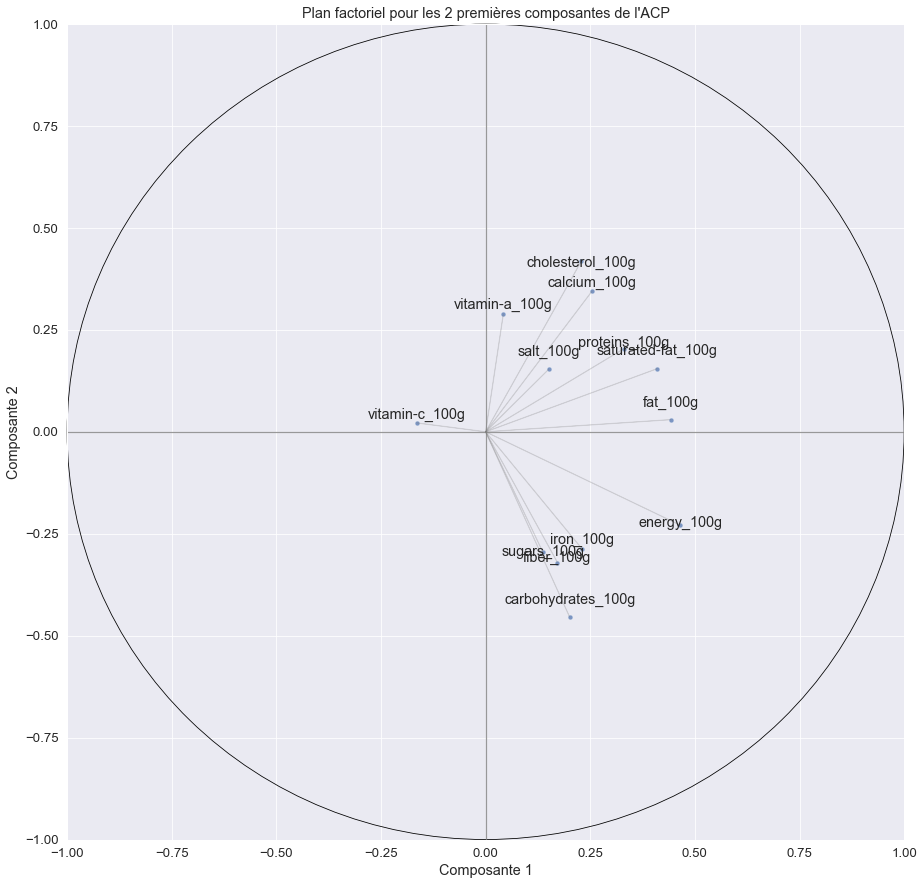

In [ ]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(15,15))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[0,:]
y_pca = pca.components_[1,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)


sns.set_context("paper", font_scale=1) 

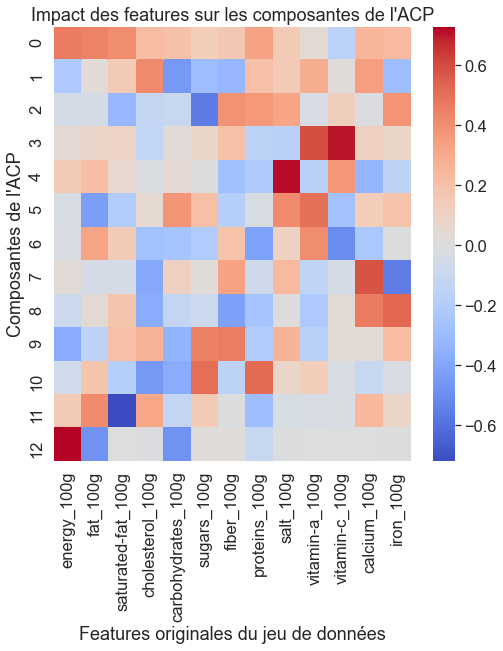

In [ ]:
pca_analysis = pd.DataFrame(pca.components_)
pca_analysis.columns = colonnes_pca

sns.set(font_scale=1.5)
plt.figure(figsize=(8,8))
sns.set
sns.heatmap(pca_analysis, cmap='coolwarm')
plt.title('Impact des features sur les composantes de l\'ACP')
plt.xlabel('Features originales du jeu de données')
plt.ylabel('Composantes de l\'ACP')
sns.set(font_scale=1)

Test ANOVA (Analyse de la variance) - Indépendance des variables

Test de Normalité

Les variables quantitatives sont-elles de distribution normale? (hypothèse à valider pour pouvoir appliquer le test d'indépendance par l'analyse de la variance ADOMA)

A : test de normalité d'Agostino & Pearson


In [ ]:
data[numeric_columns].head()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,0.0,1941.0,17.86,0.00,0.0,0.0,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0,0.071,0.00129,0.0,0.0
2,0.0,1824.0,10.91,0.91,0.0,0.0,74.55,25.45,5.5,9.09,0.25400,0.100,0.0,0.0,0.036,0.00262,6.0,6.0
3,1.0,2389.0,42.86,7.14,0.0,0.0,25.00,14.29,7.1,25.00,0.54356,0.214,0.0,0.0,0.071,0.00514,14.0,14.0
4,0.0,1255.0,0.00,0.00,0.0,0.0,83.33,66.67,10.0,0.00,0.00000,0.000,0.0,0.0,0.000,0.00000,8.0,8.0
7,0.0,1674.0,14.55,2.73,0.0,0.0,60.00,21.82,7.3,9.09,0.11430,0.045,0.0,0.0,0.073,0.00262,0.0,0.0


In [ ]:
from scipy import stats
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
numeric_columns = numeric_columns[1:]
for column in numeric_columns:
    print('________\n{}'.format(column))
    k2, p = stats.normaltest(data[column], 
                             axis=0,
                             nan_policy = 'omit')
    alpha = 5e-2
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothese: x a une distribution normale
        print("H0 est rejetée : {} n'est pas de distribution normale".format(column))
    else:
        print("H0 ne peut être rejetée :{}, on considère l'hypothèse de normalité".format(column))

________
energy_100g
p = 0
H0 est rejetée : energy_100g n'est pas de distribution normale
________
fat_100g
p = 0
H0 est rejetée : fat_100g n'est pas de distribution normale
________
saturated-fat_100g
p = 0
H0 est rejetée : saturated-fat_100g n'est pas de distribution normale
________
trans-fat_100g
p = 0
H0 est rejetée : trans-fat_100g n'est pas de distribution normale
________
cholesterol_100g
p = 0
H0 est rejetée : cholesterol_100g n'est pas de distribution normale
________
carbohydrates_100g
p = 0
H0 est rejetée : carbohydrates_100g n'est pas de distribution normale
________
sugars_100g
p = 0
H0 est rejetée : sugars_100g n'est pas de distribution normale
________
fiber_100g
p = 0
H0 est rejetée : fiber_100g n'est pas de distribution normale
________
proteins_100g
p = 0
H0 est rejetée : proteins_100g n'est pas de distribution normale
________
salt_100g
p = 0
H0 est rejetée : salt_100g n'est pas de distribution normale
________
sodium_100g
p = 0
H0 est rejetée : sodium_100g n'est pa

On ne peut pas appliquer le test Anova car les variables ne sont pas de distribution normale

#### B. Test de normalité Kolmogorov Smirnov

In [ ]:
from scipy import stats
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
numeric_columns = numeric_columns[1:]

for column in numeric_columns:
    print('________\n{}'.format(column))
    D, p = stats.kstest(data[column].dropna(), 
                     'norm', 
                     args=(data[column].mean(), data[column].std()))
    alpha = 5e-2
    print("p = {}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected : {} is not from a normal distribution".format(column))
    else:
        print("The null hypothesis cannot be rejected")



________
energy_100g
p = 0.0
The null hypothesis can be rejected : energy_100g is not from a normal distribution
________
fat_100g
p = 0.0
The null hypothesis can be rejected : fat_100g is not from a normal distribution
________
saturated-fat_100g
p = 0.0
The null hypothesis can be rejected : saturated-fat_100g is not from a normal distribution
________
trans-fat_100g
p = nan
The null hypothesis cannot be rejected
________
cholesterol_100g
p = 0.0
The null hypothesis can be rejected : cholesterol_100g is not from a normal distribution
________
carbohydrates_100g
p = 0.0
The null hypothesis can be rejected : carbohydrates_100g is not from a normal distribution
________
sugars_100g
p = 0.0
The null hypothesis can be rejected : sugars_100g is not from a normal distribution
________
fiber_100g
p = 0.0
The null hypothesis can be rejected : fiber_100g is not from a normal distribution
________
proteins_100g
p = 0.0
The null hypothesis can be rejected : proteins_100g is not from a normal dist

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\scipy\stats\_distn_infrastructure.py:1919: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


p = 0.0
The null hypothesis can be rejected : vitamin-c_100g is not from a normal distribution
________
calcium_100g
p = 0.0
The null hypothesis can be rejected : calcium_100g is not from a normal distribution
________
iron_100g
p = 0.0
The null hypothesis can be rejected : iron_100g is not from a normal distribution
________
nutrition-score-fr_100g
p = 0.0
The null hypothesis can be rejected : nutrition-score-fr_100g is not from a normal distribution
________
nutrition-score-uk_100g
p = 0.0
The null hypothesis can be rejected : nutrition-score-uk_100g is not from a normal distribution


Le test de Kolmogorov Smirnov confirme la non normalité des distributions de données : on ne peut appliquer l'analyse de la variance

#### C. ANOVA : analyse de la variance
    
Même si les données ne suivent pas une distribution normale, préparons les opérations pour appliquer le test si c'était le cas, à but d'apprentissage.

Il faut fournir en entrée au test les données pour chaque groupe, regardons un exemple d'application pour le nutrition grade et la feature salt_100g


In [ ]:
data['nutrition_grade_fr'].dropna().unique().tolist()

from scipy import stats

data_a = data[data['nutrition_grade_fr'] == 'a'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)
data_b = data[data['nutrition_grade_fr'] == 'b'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)
data_c = data[data['nutrition_grade_fr'] == 'c'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)
data_d = data[data['nutrition_grade_fr'] == 'd'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)
data_e = data[data['nutrition_grade_fr'] == 'e'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)

f_statistic, p = stats.f_oneway(
                                    data_b,
                                    data_c,
                                    data_d,
                                    data_e)

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


In [ ]:
pd.DataFrame({'features': data_b.columns.tolist(),
              'p' : p,
              'bool_test' : p<alpha})  #si p<alpha : on rejette l'hypothèse d'indépendance H0 : les variables ne sont pas indépendantes

,features,p,bool_test
0,additives_n,3.504422e-310,True
1,energy_100g,0.000000e+00,True
2,fat_100g,0.000000e+00,True
3,saturated-fat_100g,0.000000e+00,True
4,trans-fat_100g,NaN,False
5,cholesterol_100g,0.000000e+00,True
6,carbohydrates_100g,0.000000e+00,True
7,sugars_100g,0.000000e+00,True
8,fiber_100g,0.000000e+00,True
9,proteins_100g,0.000000e+00,True


En l'absence de validation de l'hypothèse de normalité, ce test n'est pas applicable mais si c'était le cas, on pourrait interpréter les résultats comme suit : Les variables suivantes ont une distribution qui change en fonction des valeurs de nutrition_grade_fr (groupes de nutrition) :

    * energy_100g
    * saturated-fat_100g
    * fiber_100g
    * salt_100g
    * sodium_100g
    * nutrition-score-fr_100g 


#### Test de student d'indépendance

Hypothèses :

    * distributions normales => comme vu précédemment cette hypothèse n'est pas acceptable
    * variance homogène => on va ramener la variance à 1 pour pouvoir appliquer le test de student

H0 : la moyenne de 2 échantillons de "salt_100g" est la même quel que soit le "nutrition grade"

Le test n'est pas applicable faute d'hypothèse de normalité.

In [ ]:
from sklearn.preprocessing import StandardScaler

data['salt_100g'].dropna()

scaler = StandardScaler(copy=True, with_mean=False, with_std=True)
a = data[['nutrition-score-fr_100g','salt_100g']].copy().dropna()
b = scaler.fit_transform(a['salt_100g'].values.reshape(-1,1))
a = a['nutrition-score-fr_100g']
a = scaler.fit_transform(a.values.reshape(-1,1))
alpha = 0.05

t_stats, p = stats.ttest_ind(a, b)

p < alpha

array([ True])

Si les distributions étaient normales, on pourrait rejetter l'hypothèse d'indépendance : la moyenne des échantillons de salt_100g est liée à la valeur de nutrition_grade

### QUESTION 4

Élaborer une idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

Idées :

    *Identifier les caractéristiques nutritionnelles des produits mauvais nutriscores et étiqueter automatiquement les produits qui ont des caractéristiques similaires
    *Calcul automatique de nutriscore
    *Vérifier si le nombre d'additifs est lié au nutriscore / mettre un indicateur sur le nombre d'additifs

Calcul automatique de nutri score par régression linéaire


*Préparation jeu de données*

In [ ]:
data_reg = data[data['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64']).dropna()

data[data['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64']).shape

data[data['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64']).dropna(axis=0).shape

data[data['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64']).isna().sum().sort_values(ascending=False)

additives_n                0
energy_100g                0
nutrition-score-fr_100g    0
iron_100g                  0
calcium_100g               0
vitamin-c_100g             0
vitamin-a_100g             0
sodium_100g                0
salt_100g                  0
proteins_100g              0
fiber_100g                 0
sugars_100g                0
carbohydrates_100g         0
cholesterol_100g           0
trans-fat_100g             0
saturated-fat_100g         0
fat_100g                   0
nutrition-score-uk_100g    0
dtype: int64

Faisons notre analyse sur un jeu de données sans les colonnes 'sodium_100g' car elle a une forte correlation avec le sel.

In [ ]:
data_reg = data[data['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64'])
data_reg = data_reg.drop(['nutrition-score-uk_100g','sodium_100g','additives_n','trans-fat_100g','carbohydrates_100g'], axis=1).dropna(axis=0)
#data_reg = data_reg.drop(['fiber_100g','additives_n'], axis=1).dropna(axis=0)

In [ ]:
data_reg.shape

(98578, 13)

In [ ]:
data_reg.isna().sum()

energy_100g                0
fat_100g                   0
saturated-fat_100g         0
cholesterol_100g           0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
vitamin-a_100g             0
vitamin-c_100g             0
calcium_100g               0
iron_100g                  0
nutrition-score-fr_100g    0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = data_reg.copy()
y = X['nutrition-score-fr_100g']
X = X.drop(['nutrition-score-fr_100g'],axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
data_reg.columns

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'cholesterol_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

### Régression linéaire multiple

In [ ]:
lr = LinearRegression().fit(X_train, y_train)
print('R² sur jeu d\'entraînement : ', lr.score(X_train,y_train))
print('R² sur jeu de test', lr.score(X_test,y_test))
print('Poids de chaque variable dans la régression', lr.coef_)
print('ordonnée à l\'origine', lr.intercept_)

R² sur jeu d'entraînement :  0.9240214993779761
R² sur jeu de test 0.9241054398324142
Poids de chaque variable dans la régression [ 1.58685788  1.76885588  3.11808144  0.3919276   3.91280501 -1.82126013
 -0.72478636  3.49013242  0.08344159 -0.01552206  0.01718441 -0.12997319]
ordonnée à l'origine 8.784683230985832


On obtient un coefficient R² de 0,999664 pour le jeu de test ce qui est un résultat excellent.


In [ ]:
resultat = pd.DataFrame({'nutriscore_reel' : y_test, 'prediction' : lr.predict(X_test)}).reset_index()

resultat.head(6)
resultat.max()

index              126051.000000
nutriscore_reel    36.000000    
prediction         40.193195    
dtype: float64

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


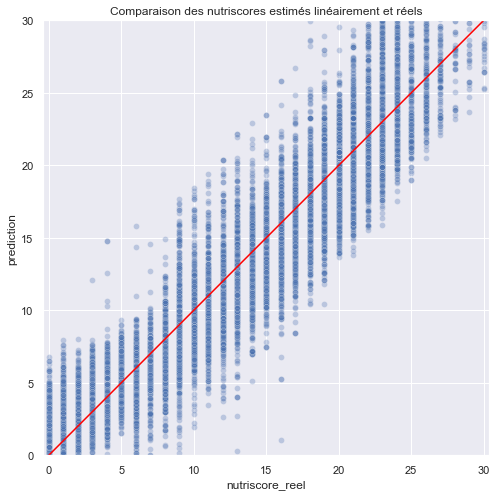

In [ ]:
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.title('Comparaison des nutriscores estimés linéairement et réels')
sns.scatterplot(x = resultat['nutriscore_reel'], y = resultat['prediction'], alpha=0.3)
sns.lineplot([0 , 30], [0, 30], color='red')
ax = plt.gca()
ax.set_xlim(0,30)
ax.set_ylim(0,30)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('root mean squared error : ', sqrt(mean_squared_error(y_true = resultat['nutriscore_reel'], y_pred = resultat['prediction'])))

compare = abs(resultat['nutriscore_reel'] - resultat['prediction'])

compare.sum()/len(compare)



root mean squared error :  2.4848382657094064


1.986855530215995

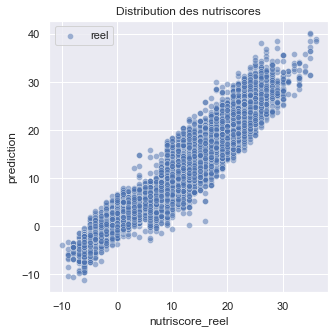

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Distribution des nutriscores')
sns.scatterplot( x = resultat['nutriscore_reel'], 
               y = resultat['prediction'], alpha=0.5)
plt.legend(['reel', 'prediction'])

C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\st

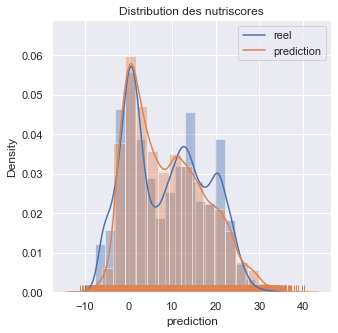

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Distribution des nutriscores')
sns.distplot(resultat['nutriscore_reel'], bins=20, rug=True)
sns.distplot(resultat['prediction'], bins = 20, rug=True)
plt.legend(['reel', 'prediction'])

In [ ]:
pertinence_variables = pd.DataFrame()

pertinence_variables['coefs'] = lr.coef_.T

pertinence_variables

,coefs
0,1.586858
1,1.768856
2,3.118081
3,0.391928
4,3.912805
5,-1.821260
6,-0.724786
7,3.490132
8,0.083442
9,-0.015522


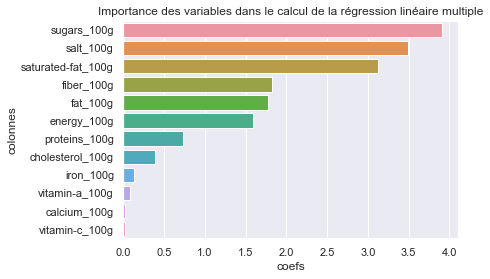

In [ ]:
pertinence_variables['colonnes']= data_reg.drop(['nutrition-score-fr_100g'], axis=1).columns.tolist()

pertinence_variables['coefs'] = abs(pertinence_variables['coefs'])

pertinence_variables.sort_values(by='coefs', inplace=True, ascending=False)

plt.title('Importance des variables dans le calcul de la régression linéaire multiple')
sns.barplot(x = pertinence_variables['coefs'], y =pertinence_variables['colonnes'])
plt.show()

### Random Forest Regressor

Le modèle par régression linéaire ne semble pas donner de bons résultats. Essayons un modèle non linéaire (modèle d'ensemble : Random Forest)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt

params = {
    'n_estimators': [50],
    'verbose' : [1]
}

rfr = GridSearchCV(RandomForestRegressor(), params, cv = 5)

In [ ]:
rfr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   14.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   15.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   15.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [50], 'verbose': [1]})

In [ ]:
print('R² sur jeu d\'entraînement : ', rfr.best_estimator_.score(X_train,y_train))
print('R² sur jeu de test', rfr.best_estimator_.score(X_test,y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


R² sur jeu d'entraînement :  0.9994614456313691
R² sur jeu de test 0.9963922581282305


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


In [ ]:
print('RMSE = ', sqrt(mean_squared_error(y_test, rfr.best_estimator_.predict(X_test))))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE =  0.5414981371243042


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-12.3, 38.3, -36.870772181196465, 47.151767430537255)

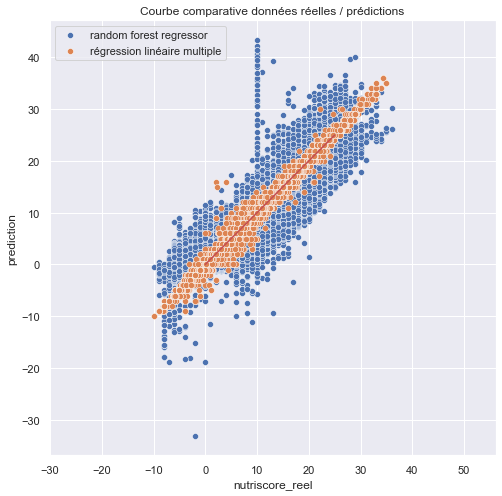

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Courbe comparative données réelles / prédictions')
sns.scatterplot(x = resultat['nutriscore_reel'], y = resultat['prediction'])
sns.scatterplot(x = rfr.predict(X_test),y = y_test)
plt.legend(['random forest regressor', 'régression linéaire multiple'])
sns.lineplot([0,25],[0,25], color='r')
ax = plt.gca()
ax.set_xlim(0,25)
ax.set_ylim(0,25)
ax.axis('equal')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\stela\Anaconda3\envs\torch_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


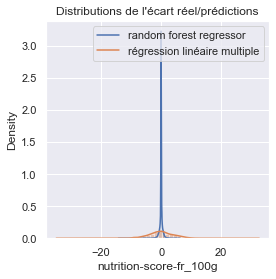

In [ ]:
plt.figure(figsize=(4,4))
plt.title('Distributions de l\'écart réel/prédictions')
sns.distplot(rfr.predict(X_test) -  y_test)
sns.distplot(resultat['nutriscore_reel'] - resultat['prediction'])
plt.legend(['random forest regressor', 'régression linéaire multiple'])

<AxesSubplot:title={'center':'Importance des variables dans le random forest'}, xlabel='importance', ylabel='feature'>

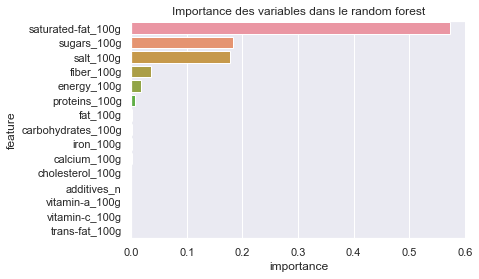

In [ ]:


random_forest_features = pd.DataFrame({'feature' : data_reg.drop(['nutrition-score-fr_100g'],axis=1).columns,
                                      'importance' : rfr.best_estimator_.feature_importances_})

random_forest_features.sort_values(by='importance',ascending=False, inplace=True)

plt.title('Importance des variables dans le random forest')

sns.barplot(y = random_forest_features['feature'], x=random_forest_features['importance'])



Bien que le random forest soit plus précis dans sa prédiction soit plus précise utilise beacoup moins de variables que La regression multiple. On peut desormais prédire le score nutrition `nutrition-score-fr_100g`